# Group Assignment 
# Group 367

## Part 1: Input the data

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

conn = sqlite3.connect("rmp_database.sqlite")

In [2]:
#integrate SQLite3 with pandas to read info from professors table
professors = pd.read_sql("SELECT * FROM professors;", conn) 

#integrate SQLite3 with pandas to read info from reviews table
reviews = pd.read_sql("SELECT * FROM reviews;", conn) 

## Overview of the data

In [3]:
#have a look the first 10 columns of info from reviews table 
reviews.head(10) 

,prof_id,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,0,08/19/2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel..."
1,1,03/07/2013,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...
2,1,10/14/2011,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...
3,2,09/05/2017,PHIL507,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor..."
4,2,07/17/2017,PHL110E,1.0,4.0,Mandatory,Yes,No,None,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...
5,2,01/16/2010,PHIL200,3.5,4.0,None,None,None,None,None,0,1,No Comments
6,2,07/29/2009,PHL252,5.0,5.0,None,None,None,None,None,5,1,She is an extremely demanding professor. The w...
7,3,01/23/2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...
8,4,07/22/2015,KIN484,5.0,3.0,Mandatory,Yes,None,None,None,0,0,Steph was very helpful and cared about our exp...
9,4,07/22/2015,KIN483,5.0,2.0,Mandatory,Yes,None,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.


In [4]:
#get a overview info of the reviews table
reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19685 entries, 0 to 19684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prof_id            19685 non-null  int64  
 1   post_date          19672 non-null  object 
 2   name_onlines       19685 non-null  object 
 3   student_star       19672 non-null  float64
 4   student_difficult  19672 non-null  float64
 5   attence            5232 non-null   object 
 6   for_credits        5529 non-null   object 
 7   would_take_agains  3524 non-null   object 
 8   grades             4271 non-null   object 
 9   stu_tags           4975 non-null   object 
 10  help_useful        19685 non-null  int64  
 11  help_not_useful    19685 non-null  int64  
 12  comments           19584 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [5]:
#get a overview of how many missing values in reviews table
reviews.isnull().sum() 

prof_id                  0
post_date               13
name_onlines             0
student_star            13
student_difficult       13
attence              14453
for_credits          14156
would_take_agains    16161
grades               15414
stu_tags             14710
help_useful              0
help_not_useful          0
comments               101
dtype: int64

In [6]:
#check the top 10 colums of info from professors table 
professors.head(10) 

,prof_id,professor_name,gender,age,school_name,department_name,local_name,state_name
0,0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL
1,1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX
2,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT
3,3,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT
4,4,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT
5,5,Lawrence MacDonnell,M,1952.0,St. Francis Xavier University,History department,Antigonish,NS
6,6,David Burke,M,1960.0,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA
7,7,Dana Rush,F,1971.0,Pacific Lutheran University,Physics department,Tacoma,WA
8,8,Angia MacOmber,F,1964.0,Taylor University,Education department,Upland,IN
9,9,Ayumi Gervais,F,2012.0,Grossmont College,Foreign Languages department,El Cajon,CA


In [7]:
#get the overview info from professors table
professors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prof_id          2770 non-null   int64  
 1   professor_name   2770 non-null   object 
 2   gender           2564 non-null   object 
 3   age              2564 non-null   float64
 4   school_name      2770 non-null   object 
 5   department_name  2770 non-null   object 
 6   local_name       2770 non-null   object 
 7   state_name       2770 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 173.2+ KB


In [8]:
#get a overview of how many missing values in professors table
professors.isnull().sum() 

prof_id              0
professor_name       0
gender             206
age                206
school_name          0
department_name      0
local_name           0
state_name           0
dtype: int64

# Part 2: Analysis of data
In this part, the attributes 'Demographics of the Professor' will be focus in below analyis.
Three key research questions need to address:
1. How to define the demographic of the professor?
2. Which factors affect the professors star rating the most?
3. Which kind of professors has higher rating?

In [9]:
#Details analysis of the research will be shown in below.
#Based on the overview of professors and reviews table, two tables need to join together in order to observe the relationships between them.

#query to join the professors and reviews table tgt by the same prof_id
import pandas as pd

query = "SELECT *\
        FROM professors pro\
        JOIN reviews rev\
        ON pro.prof_id = rev.prof_id;" 

#join two tables tgt
combine = pd.read_sql(query, conn) 

#show top 10 colums of the combine table
combine.head(10) 

,prof_id,professor_name,gender,age,school_name,department_name,local_name,state_name,prof_id,post_date,...,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments
0,0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,0,08/19/2010,...,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel..."
1,1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,1,03/07/2013,...,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...
2,1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,1,10/14/2011,...,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...
3,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,01/16/2010,...,3.5,4.0,None,None,None,None,None,0,1,No Comments
4,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,07/17/2017,...,1.0,4.0,Mandatory,Yes,No,None,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...
5,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,07/29/2009,...,5.0,5.0,None,None,None,None,None,5,1,She is an extremely demanding professor. The w...
6,2,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,2,09/05/2017,...,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor..."
7,3,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT,3,01/23/2010,...,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...
8,4,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,4,01/16/2013,...,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul..."
9,4,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,4,01/24/2010,...,1.5,5.0,None,None,None,None,None,0,0,Horrible. I went to class everyday and it stil...


In [10]:
#show the gnereal information of the combine table
combine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19685 entries, 0 to 19684
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prof_id            19685 non-null  int64  
 1   professor_name     19685 non-null  object 
 2   gender             18145 non-null  object 
 3   age                18145 non-null  float64
 4   school_name        19685 non-null  object 
 5   department_name    19685 non-null  object 
 6   local_name         19685 non-null  object 
 7   state_name         19685 non-null  object 
 8   prof_id            19685 non-null  int64  
 9   post_date          19672 non-null  object 
 10  name_onlines       19685 non-null  object 
 11  student_star       19672 non-null  float64
 12  student_difficult  19672 non-null  float64
 13  attence            5232 non-null   object 
 14  for_credits        5529 non-null   object 
 15  would_take_agains  3524 non-null   object 
 16  grades             427

In [11]:
#get a overview of the missing values in combine table
combine.isnull().sum() 

prof_id                  0
professor_name           0
gender                1540
age                   1540
school_name              0
department_name          0
local_name               0
state_name               0
prof_id                  0
post_date               13
name_onlines             0
student_star            13
student_difficult       13
attence              14453
for_credits          14156
would_take_agains    16161
grades               15414
stu_tags             14710
help_useful              0
help_not_useful          0
comments               101
dtype: int64

In [12]:
#Because the prof_id is doubled so i delected and combined two into one 
combine = combine.drop("prof_id", axis=1)
combine['prof_id'] = reviews['prof_id'] 

In [13]:
#overview of the combine table after combined two prof_id tgt
combine.head(10) 

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,08/19/2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,03/07/2013,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...,1
2,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,10/14/2011,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...,1
3,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,01/16/2010,PHIL200,3.5,4.0,None,None,None,None,None,0,1,No Comments,2
4,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,07/17/2017,PHL110E,1.0,4.0,Mandatory,Yes,No,None,LOTS OF HOMEWORK GET READY TO READ TOUGH GRADER,0,2,Took 100 level class for Ethics offered online...,2
5,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,07/29/2009,PHL252,5.0,5.0,None,None,None,None,None,5,1,She is an extremely demanding professor. The w...,2
6,Soazig Le Bihan,None,NaN,University of Montana - Missoula,Philosophy department,Missoula,MT,09/05/2017,PHIL507,5.0,5.0,Mandatory,Yes,Yes,A,ACCESSIBLE OUTSIDE CLASS GET READY TO READ T...,0,0,"A very hard class, and a massive amount of wor...",2
7,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT,01/23/2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/16/2013,HHP226,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
9,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/24/2010,HHP236,1.5,5.0,None,None,None,None,None,0,0,Horrible. I went to class everyday and it stil...,4


In [14]:
#Since i chose the gender, age and post_date as the demographic factors and student_star as the result, so the anlysis of those features in below.
demo = ["age","gender", "student_star", "post_date"]

#check the missing values in particular age,gender and student_star colums in combine table
combine[demo].isnull().sum()

age             1540
gender          1540
student_star      13
post_date         13
dtype: int64

In [15]:
#drop the missing values 
clean = combine.dropna(subset = demo, axis = 0) 

#show the first 10 colums after dropped the values
clean.head(10) 

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,M,1956.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,08/19/2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
1,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,03/07/2013,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,such a fun professor. really helpful and knows...,1
2,Marshall Levett,M,2015.0,Austin Community College,Counseling department,Austin,TX,10/14/2011,HUDE0111,5.0,1.0,None,None,None,None,None,0,0,Such a easy class. It\'s simple. Do your homew...,1
7,Gyda Swayney,F,1952.0,University of Montana - Missoula,Psychology department,Missoula,MT,01/23/2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/16/2013,HHP226,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
9,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,01/24/2010,HHP236,1.5,5.0,None,None,None,None,None,0,0,Horrible. I went to class everyday and it stil...,4
10,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,05/06/2010,HHP236,4.5,4.0,None,None,None,None,None,1,0,She was awesome! If you went to class and list...,4
11,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,07/22/2015,KIN483,5.0,2.0,Mandatory,Yes,None,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,07/22/2015,KIN484,5.0,3.0,Mandatory,Yes,None,None,None,0,0,Steph was very helpful and cared about our exp...,4
13,Stephanie Domitrovich,F,1990.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,08/01/2009,NUTR236,1.5,5.0,None,None,None,None,None,0,0,No Comments,4


In [16]:
#get a overview info of clean data after dropped the missing values of age, gender and student_star
clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18132 entries, 0 to 19684
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   professor_name     18132 non-null  object 
 1   gender             18132 non-null  object 
 2   age                18132 non-null  float64
 3   school_name        18132 non-null  object 
 4   department_name    18132 non-null  object 
 5   local_name         18132 non-null  object 
 6   state_name         18132 non-null  object 
 7   post_date          18132 non-null  object 
 8   name_onlines       18132 non-null  object 
 9   student_star       18132 non-null  float64
 10  student_difficult  18132 non-null  float64
 11  attence            4821 non-null   object 
 12  for_credits        5109 non-null   object 
 13  would_take_agains  3251 non-null   object 
 14  grades             3924 non-null   object 
 15  stu_tags           4587 non-null   object 
 16  help_useful        181

## Analysis: Gender
1. The distribution of the professors gneder: more male or female?
2. Whether male professors has higher rating or lower?
3. Any limitation in the analysis?

In [17]:
#After clean the data, count the numbers of male and female 
clean['gender'].value_counts() 

M    9170
F    8962
Name: gender, dtype: int64

In [18]:
#After checked the gender distribution, there is no much different between the numbers of male or females professor, approxiately half half distribution.
#Therefore, i want to check will the student rating affected by the gender of professor. So i did the below analysis:

#check the mean of studnet star according by gender
clean.groupby("gender").mean()['student_star'] 

gender
F    3.756528
M    3.819520
Name: student_star, dtype: float64

In [19]:
#Both mean score is quite similar, it could not see any directly relationship bwtween gender and studnet rating.
#Furthermore, i did a crossover table in student_star and gender in order to have a deeply overview the number of gender in differnt score.

print(pd.crosstab(clean["gender"],clean["student_star"])) 

student_star   1.0  1.5  2.0  2.5  3.0  3.5   4.0   4.5   5.0
gender                                                       
F             1002  383  539  343  543  425  1031  1133  3563
M              866  352  568  348  530  467  1163  1263  3613


In [20]:
#The above table showed that mostly each gender in different score have similars numbers.
#It could not conclude that any specific gneder will realatively get higher or lower marks.
#Since i want to check the correlation and covariance bwtween the gender and student_star,so i transform the dummy encoding below. 

tran = {"M":1, "F":0}
clean["gender"] = clean["gender"].replace(tran) 
print(clean["gender"])

0        1
1        1
2        1
7        0
8        0
        ..
19680    0
19681    0
19682    0
19683    0
19684    0
Name: gender, Length: 18132, dtype: int64


In [21]:
#show the correlation between gender and student_star
clean.corr()["gender"]["student_star"] 

0.022461521195865582

In [22]:
#show the covariance between gender and studnet_star
clean.cov()["gender"]["student_star"] 

0.01574694952073364

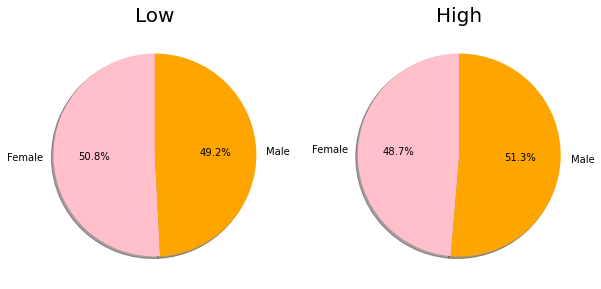

In [23]:
#The above correlation and covariance results are 0.0225 and 0.0157.
#It showed that there is no directly relationships between gender and student_star.
#In order to visualise the data, i plot the pie chart to show the mean score acoording to gender.

mean_rate = clean["student_star"].mean()

low = clean.query("student_star <= @mean_rate")["gender"].value_counts().sort_index()
high = clean.query("student_star >= @mean_rate")["gender"].value_counts().sort_index()

plt.figure(figsize = (10,9))

plt.subplot(1, 2, 1)
plt.pie(low, labels = ["Female", "Male"], colors = ["pink","orange"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("Low", fontsize = 20)

plt.subplot(1, 2, 2)
plt.pie(high, labels = ["Female", "Male"], colors = ["pink", "orange"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("High", fontsize = 20)

plt.show()

In [24]:
#The above pie chart showed that both gender have similar percentage in high and low marks group. 
#The student_star score will not affected by whether the professor is a male or fmeale. 

In [25]:
stats.ttest_ind(clean["student_star"][clean["gender"] == 1],
               clean["student_star"][clean["gender"] == 0])

Ttest_indResult(statistic=3.0251551294933057, pvalue=0.002488537189518353)

- The t-test result showed that a significant difference between student_star and gender

### Conclusion about the gender
- The distribution of gender are likely equal to each others. 
- Based on the analysis showed that there is no direct relationship among gender and student_score. The correlation and covariance is near 0. It means no correlation and they are not linked at all. 
- The pie chart also clearly proved that the percentage of male and female score in low and high are quite similar. 
- Those analysis can conclude that student_star will not directly affected by gender.

## Analysis:Age & Post date
1. What is the age distribution among professors?
2. Which age group of professor has higher rating?
3. Any limitaion in this analysis? 

In [26]:
#Overview of the age colums and found out that the data is showing the date of birth of professor

clean["age"].describe() 

count    18132.000000
mean      1972.856773
std         19.654948
min       1916.000000
25%       1958.000000
50%       1966.000000
75%       1987.000000
max       2015.000000
Name: age, dtype: float64

In [27]:
#Overview of age column
clean["age"].head()

0    1956.0
1    2015.0
2    2015.0
7    1952.0
8    1990.0
Name: age, dtype: float64

In [28]:
#Overview of post_date
clean["post_date"].head()

0    08/19/2010
1    03/07/2013
2    10/14/2011
7    01/23/2010
8    01/16/2013
Name: post_date, dtype: object

In [29]:
#Since the post date is showing in d/m/y format and convert to only showing year 
clean["post_date"] = clean["post_date"].astype("datetime64[ns]").dt.year

In [30]:
#Since the data showing the date of birth of tutor,so minus it by the post_date to calcualte professor's age
clean["age"] = clean["post_date"] - clean["age"]

#show the professor's age
clean["age"].head(10) 

0     54.0
1     -2.0
2     -4.0
7     58.0
8     23.0
9     20.0
10    20.0
11    25.0
12    25.0
13    19.0
Name: age, dtype: float64

In [31]:
#get a overview of the data in age
clean["age"].describe() 

count    18132.000000
mean        39.244705
std         19.866477
min        -10.000000
25%         25.000000
50%         45.000000
75%         55.000000
max        100.000000
Name: age, dtype: float64

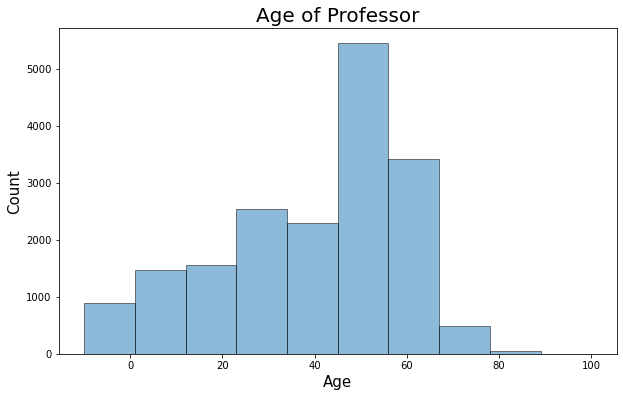

In [32]:
#To plot a histagram to visualise the data in professor's age
plt.figure(figsize=(10,6))
plt.hist(clean["age"], bins = 10, edgecolor = "k", alpha=0.5) 

plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Age of Professor", fontsize = 20)

plt.show()

In [33]:
#From the histagram, we can observe that there may have some error in data like the professor is under 20 and older that 100.
#Therefore, i need to select the correct inforamtion to analyse in next step.

#Only choose the age between 20 to 80 years old, since under 20 is too young not abel to be professor and the number of sample size is too small for over 80
clean = clean.query("age > 20 & age < 80") 
clean.head() 

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,1,54.0,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,2010,UP347,3.5,2.0,None,None,None,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
7,Gyda Swayney,0,58.0,University of Montana - Missoula,Psychology department,Missoula,MT,2010,PSYX352,3.0,2.0,None,None,None,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,0,23.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2013,HHP226,1.0,4.0,None,None,None,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
11,Stephanie Domitrovich,0,25.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN483,5.0,2.0,Mandatory,Yes,None,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,0,25.0,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN484,5.0,3.0,Mandatory,Yes,None,None,None,0,0,Steph was very helpful and cared about our exp...,4


In [34]:
#check the correlation between the age and student star
clean.corr()['age']["student_star"] 

-0.06324048920295551

In [35]:
#check the covariance between the age and student star
clean.cov()['age']['student_star'] 

-1.1126033745560466

In [36]:
#After observed the correlation and covariance of the age and student_star, it can conclud that a weak ralationships between them.
#Then, i want to know the age distribution among the professor group so i divided them into 4 groups. 
#Details analysis in below:

clean["age"] = pd.cut(clean['age'], bins = [20,40,60,80], labels = ["Young", "Middle", "Old"]).astype("str")
clean["age"].value_counts().sort_index()

Middle    8374
Old       1785
Young     4362
Name: age, dtype: int64

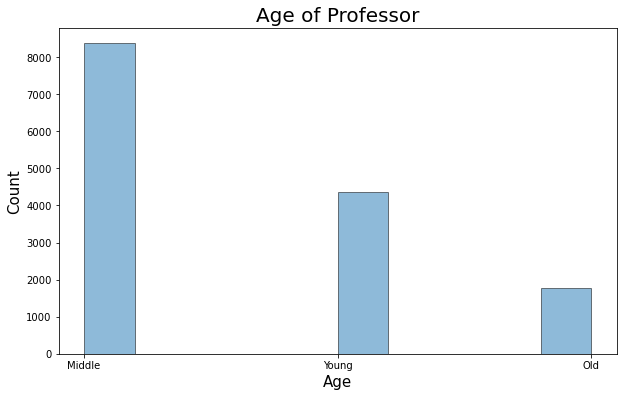

In [37]:
#Plot a histagram to visualise the data in professor age after chose the age bwtween 20 to 100
plt.figure(figsize=(10,6))
plt.hist(clean["age"], bins = 10, edgecolor = "k", alpha=0.5) 

plt.xlabel("Age", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Age of Professor", fontsize = 20)

plt.show()

In [38]:
#Based on the above analysis, most of the professor are belong to young age group and followed by middle, young groups.
#Only few of the professor are between 80-100 years old. 

#observe the mean score different between each age group. 
clean.groupby("age").mean()["student_star"] 

age
Middle    3.769047
Old       3.660224
Young     3.907038
Name: student_star, dtype: float64

In [39]:
#The analysis show that the mean score of 20-40 and 40-60 are quite similar. 
#A slightly lower in 60-80 age group 
#It can observe that younger professor tend to have higher marks.

In [40]:
stats.ttest_ind(clean["student_star"][clean["age"] == "Young"],
               clean["student_star"][clean["age"] == "Middle"])

Ttest_indResult(statistic=5.307319040939197, pvalue=1.1311641222865738e-07)

In [41]:
stats.ttest_ind(clean["student_star"][clean["age"] == "Young"],
               clean["student_star"][clean["age"] == "Old"])

Ttest_indResult(statistic=6.401345219859894, pvalue=1.6539602140038963e-10)

In [42]:
stats.ttest_ind(clean["student_star"][clean["age"] == "Middle"],
               clean["student_star"][clean["age"] == "Old"])

Ttest_indResult(statistic=2.9183707624963082, pvalue=0.003526376230582431)

- From the t-test result showed the a significant difference between student_star rating among each age groups(young, middle and old). 

## Reference to previous analysis, we can conclude few main points:
1. 40-60 age group have the most numbers of professors and followed by 20-40, 40-60.
2. There is no correlation between age and student_star since the result of correlation is -0.0632. It can only observe that when the professor get older, it may have a bit marks reduce in the student_star rating.
3. Younger professor tend to have higher mark in student_star rating due to the analysis showed that 20-40 and 40-60 age groups have a higher mean in student rating.

## Limitation in this part:
1. The age under the dataset may not accurate because age is inferred from the professor's name using the agefromname Python package.

## Analysis:Age and Gender
After observed the age and gender variable separately, combining two factors together to check any different in marks in a particular age and gender group. 

In [43]:
#chcek the crossover table any different in marks when age and gender combine tgt
mix = pd.crosstab(clean["age"], clean["gender"], clean["student_star"],aggfunc = "mean") 
print(mix) 

gender         0         1
age                       
Middle  3.728961  3.795631
Old     3.634531  3.743468
Young   3.916472  3.893534


In [44]:
#Based on the analysis, it showed that not much different in between gender belong to age 20-40 and 60-80 groups.
#A slighly differnt in 40-60 group, female professors have a bit lower mean score than male.
#Male professor would relatively perform better in 80-100 age group.

#check the numbers of professor in particular age and gender
print(pd.crosstab(clean["age"], clean["gender"]))

gender     0     1
age               
Middle  3339  5035
Old     1364   421
Young   2568  1794


<function matplotlib.pyplot.show(*args, **kw)>

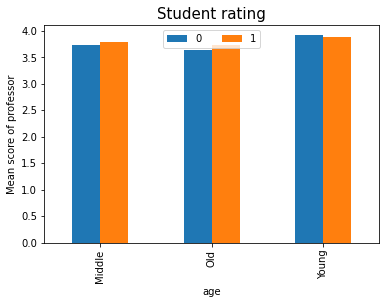

In [45]:
#To visualise the data 
mix.plot(kind="bar")

plt.ylabel("Mean score of professor", fontsize = 10)
plt.title("Student rating", fontsize = 15)
plt.legend(loc='upper center', ncol=3)
plt.show

- Based on the above analysis, there are not mcuh different in mean of student rating in a particular age and gender group. 
- The student_star will not affected by the professor's age and gender. 

## Conclusion and Limitions for age and gender

- In conclusion, the demographic of the professors will not affect the Professor ratings too much. Since the above analysis showed that the correlation of age and gender bwtween student_star is so low. 
- Also, gender and age are both inferred from the professor's name using the agefromname Python package. Therefore, it may have some errors exist there.

## Analysis: For credit
- Will the student who took for credit give higher mark in student_rating?

In [46]:
clean["for_credits"].describe()

count     4227
unique       2
top        Yes
freq      4204
Name: for_credits, dtype: object

In [47]:
clean["for_credits"].head(10)

0     None
7     None
8     None
11     Yes
12     Yes
17    None
18    None
19    None
20    None
21     Yes
Name: for_credits, dtype: object

In [48]:
clean["for_credits"].isnull().sum()

10294

In [49]:
# Fill in the missing values
clean["for_credits"].fillna("Unknown", inplace = True)

In [50]:
pd.crosstab(clean["for_credits"], clean["student_star"])

student_star,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
for_credits,,,,,,,,,
No,12,0,0,0,3,0,0,0,8
Unknown,978,503,605,428,549,548,1100,1531,4052
Yes,497,95,274,119,290,166,637,328,1798


- for those studnet who give 5marks in student_star rating, most of them took the class for credits.

In [51]:
#transform the dummy variables
transform = {"Yes":1, "No":0, "Unknown":0}
clean["for_credits"] = clean["for_credits"].replace(transform) 
print(clean["for_credits"])

0        0
7        0
8        0
11       1
12       1
        ..
19680    0
19681    0
19682    1
19683    0
19684    0
Name: for_credits, Length: 14521, dtype: int64


In [52]:
clean.corr()["for_credits"]["student_star"]

-0.0014168648251650846

In [53]:
clean.cov()["for_credits"]["student_star"]

-0.0009020942975529846

In [54]:
stats.ttest_ind(clean["student_star"][clean["for_credits"] == 1],
               clean["student_star"][clean["for_credits"] == 0])

Ttest_indResult(statistic=-0.17072503375599124, pvalue=0.8644423566682637)

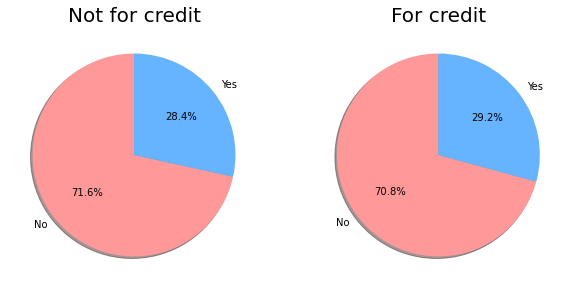

In [55]:
mean_rate1 = clean["student_star"].mean()

not_for_credit = clean.query("student_star <= @mean_rate1")["for_credits"].value_counts().sort_index()
for_credit = clean.query("student_star >= @mean_rate1")["for_credits"].value_counts().sort_index()

plt.figure(figsize = (10,9))

plt.subplot(1, 2, 1)
plt.pie(not_for_credit, labels = ["No", "Yes"], colors = ["#ff9999","#66b3ff"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("Not for credit", fontsize = 20)

plt.subplot(1, 2, 2)
plt.pie(for_credit, labels = ["No", "Yes"], colors = ["#ff9999", "#66b3ff"], autopct = "%1.1f%%", shadow=True, startangle=90)
plt.title("For credit", fontsize = 20)

plt.show()

- From the t-test result, it showed that for_credits is not significant to the student_star rating. 
- The correlation and coviarance show no relationship
- The pie chart show that for_credits does not affect the student_star. 

## Analysis: Would take agains
- Will the students who are willing to take the coursse again that give higher mark for student_star?

In [56]:
clean["would_take_agains"].describe()

count     2684
unique       2
top        Yes
freq      2018
Name: would_take_agains, dtype: object

In [57]:
clean["would_take_agains"].isnull().sum()

11837

In [58]:
clean["would_take_agains"].fillna("Unknown", inplace = True)

In [59]:
clean["would_take_agains"]

0        Unknown
7        Unknown
8        Unknown
11       Unknown
12       Unknown
          ...   
19680    Unknown
19681    Unknown
19682        Yes
19683    Unknown
19684    Unknown
Name: would_take_agains, Length: 14521, dtype: object

In [60]:
pd.crosstab(clean["would_take_agains"], clean["student_star"])

student_star,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
would_take_agains,,,,,,,,,
No,350,0,180,0,109,0,22,0,5
Unknown,1136,598,691,545,658,682,1301,1748,4478
Yes,1,0,8,2,75,32,414,111,1375


- For those who won't take agains, most of the student rating is below 3 and largely in 1.
- For those who would tale agains, most of the student rating is higher or equal to 4. Many of student_star in 5 would take it again.

In [61]:
transform2 = {"No":0, "Unknown":0, "Yes":1}
clean["would_take_agains"]= clean["would_take_agains"].replace(transform2)
clean["would_take_agains"]

0        0
7        0
8        0
11       0
12       0
        ..
19680    0
19681    0
19682    1
19683    0
19684    0
Name: would_take_agains, Length: 14521, dtype: int64

In [62]:
clean.corr()["would_take_agains"]["student_star"]

0.24491742718567508

In [63]:
clean.cov()["would_take_agains"]["student_star"]

0.11893312629965186

In [64]:
stats.ttest_ind(clean["student_star"][clean["would_take_agains"] == 1],
               clean["student_star"][clean["would_take_agains"] == 0])

Ttest_indResult(statistic=30.43831060848312, pvalue=2.5407512929234993e-197)

- Based on the t-test result, it shows that "would_take_agains" is significant affecting in 'student_star"
- The covariance and correlation show that a low positive relationship.

In [65]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14521 entries, 0 to 19684
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   professor_name     14521 non-null  object 
 1   gender             14521 non-null  int64  
 2   age                14521 non-null  object 
 3   school_name        14521 non-null  object 
 4   department_name    14521 non-null  object 
 5   local_name         14521 non-null  object 
 6   state_name         14521 non-null  object 
 7   post_date          14521 non-null  int64  
 8   name_onlines       14521 non-null  object 
 9   student_star       14521 non-null  float64
 10  student_difficult  14521 non-null  float64
 11  attence            3957 non-null   object 
 12  for_credits        14521 non-null  int64  
 13  would_take_agains  14521 non-null  int64  
 14  grades             3276 non-null   object 
 15  stu_tags           3797 non-null   object 
 16  help_useful        145

## Analysis: Discipline of study and university 

### Basic database reading and process

Using sqlite function to import the database, and then to combine two tables on key ['prof_id']

Use .isnull() function to check the missing values, then use .dropna() to remove null values. Which makes the data more feasible.

Student_star is the key feature for professor ratings, just through value_counts(), it is clear to see that majority of students give ratings equal or greater than 4.0

In [66]:
clean['student_star'].value_counts().sort_values()

2.5     547
1.5     598
3.5     714
3.0     842
2.0     879
1.0    1487
4.0    1737
4.5    1859
5.0    5858
Name: student_star, dtype: int64

The correlation analyse shows that there are negative correlation between student_star and some features. 

In [67]:
reviews.corr()

,prof_id,student_star,student_difficult,help_useful,help_not_useful
prof_id,1.000000,-0.000169,0.004870,-0.036332,-0.025639
student_star,-0.000169,1.000000,-0.457000,-0.128778,-0.071581
student_difficult,0.004870,-0.457000,1.000000,0.104056,0.048510
help_useful,-0.036332,-0.128778,0.104056,1.000000,0.226200
help_not_useful,-0.025639,-0.071581,0.048510,0.226200,1.000000


From reading the data dictionary, universities that the professor works in, the subjects that they teach, the attendance, and tags that student use for description are most related to the discipline of study and university.

## Analysis: University and professor ratings

In [68]:
clean['school_name'].value_counts().describe()
#University names are non-numerical data type, therefore we use value-counts to find out how many times the professor in each univeristy has been rated, then it's able to linked with the rating score.

count    995.000000
mean      14.593970
std       17.292372
min        1.000000
25%        3.000000
50%        9.000000
75%       20.000000
max      138.000000
Name: school_name, dtype: float64


* Because the data size is quite large, and many universities had only been counted once, which could not use to explain the relationship.
* Based on the 50% of the data are counted 10 times and the mean is 17.47. Hence, universities counted more than nine times will be included.





In [69]:
criteria = clean['school_name'].value_counts()>9
schools = criteria[criteria == True].index
study = clean[clean['school_name'].isin(schools)]
study.head()

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,1,Middle,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,2010,UP347,3.5,2.0,None,0,0,None,None,0,0,"Good guy, laid back and interested in his fiel...",0
7,Gyda Swayney,0,Middle,University of Montana - Missoula,Psychology department,Missoula,MT,2010,PSYX352,3.0,2.0,None,0,0,None,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2013,HHP226,1.0,4.0,None,0,0,None,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
11,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN483,5.0,2.0,Mandatory,1,0,None,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN484,5.0,3.0,Mandatory,1,0,None,None,0,0,Steph was very helpful and cared about our exp...,4


In [70]:
study['school_name'].value_counts()

Arizona State University                 138
California State University Fullerton    134
Stony Brook University (SUNY)            114
DePaul University                        106
George Mason University                  101
                                        ... 
Saint Xavier University                   10
Tyler School of Art                       10
Naval Academy Preparatory School          10
Miami Dade College (all)                  10
Dutchess Community College                10
Name: school_name, Length: 467, dtype: int64

Through .groupby() function, we find out the average rating for each university

In [71]:
rank_schools = study.groupby('school_name').mean()['student_star'].sort_values(ascending= False)
rank_schools.sort_index()

school_name
Adelphi University                                  4.326087
Amberton University                                 4.583333
American Public University System (all campuses)    3.500000
Angelo State University                             3.900000
Anne Arundel Community College (all campuses)       4.846154
                                                      ...   
Wright State University                             4.307692
Wytheville Community College                        3.157895
Xavier University                                   4.775000
York University (all campuses)                      3.206897
Yuba College                                        4.343750
Name: student_star, Length: 467, dtype: float64

In [72]:
rank_schools.describe()

count    467.000000
mean       3.800440
std        0.727465
min        1.409091
25%        3.381944
50%        3.880000
75%        4.337121
max        5.000000
Name: student_star, dtype: float64

In [73]:
uni = study['school_name'].value_counts()
rate = rank_schools.head(20)

table = pd.crosstab(uni,rate)
table

student_star,4.866667,4.875000,4.884615,4.888889,4.894737,4.895833,4.909091,4.911765,4.937500,4.947368,4.950000,4.952381,4.966667,5.000000
school_name,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,2,0,0,0
11,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,0,0,0,1
15,1,0,0,0,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17,0,0,0,0,0,0,0,1,0,0,0,0,0,0
18,0,0,0,1,0,0,0,0,0,0,0,0,0,1
19,0,0,0,0,2,0,0,0,0,1,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [74]:
rank_schools.head(20)

school_name
Southwestern Illinois College               5.000000
Baker College of Clinton Township           5.000000
Millersville University                     5.000000
Ohlone College                              5.000000
Carroll Community College                   5.000000
Santa Barbara City College                  4.966667
Bucks County Community College              4.952381
Leeward Community College                   4.950000
Fayetteville Technical Community College    4.950000
Evergreen Valley College                    4.947368
Kingsborough Community College              4.937500
Governors State University                  4.911765
University of the Incarnate Word            4.909091
Embry-Riddle Aeronautical University        4.895833
Three Rivers Community College              4.894737
Miller-Motte Technical College              4.894737
Georgia Southern University                 4.888889
Ohio University                             4.884615
Wayne County Community College    

In [75]:
uni = study['school_name'].value_counts()
rate = rank_schools.tail(20)

table = pd.crosstab(uni,rate)
table

student_star,1.409091,1.466667,1.825000,1.846154,1.868421,1.950000,2.000000,2.045455,2.076923,2.125000,2.136364,2.142857,2.150000,2.160000,2.176471,2.187500,2.210526
school_name,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
13,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
20,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [76]:
rank_schools.tail(20)

school_name
University of Regina                           2.210526
University of Missouri-Kansas City             2.187500
Douglas College                                2.176471
Pennsylvania State University                  2.160000
University of South Florida St. Petersburg     2.150000
Bakersfield College                            2.142857
Duke University                                2.136364
Southern Illinois University - Edwardsville    2.125000
Northeastern University                        2.076923
Roosevelt University                           2.045455
Sam Houston State University                   2.000000
University of South Florida                    2.000000
Westfield State University                     1.950000
Saint Xavier University                        1.950000
Clarion University of Pennsylvania             1.950000
Wake Technical Community College               1.868421
Jones International University                 1.846154
Oregon Institute of Technology      



* Over half of the student rating are above the average rating which is 3.74
* Through the cross table and the bar chart, it shows that for high ranking groups and low ranking groups are from those highly counted univeristies, which means these data are representative. 
* and it seems to be that students whom are really 
satisfied and whom are very unsatisfied are more likely to provide their feedback on their professors.



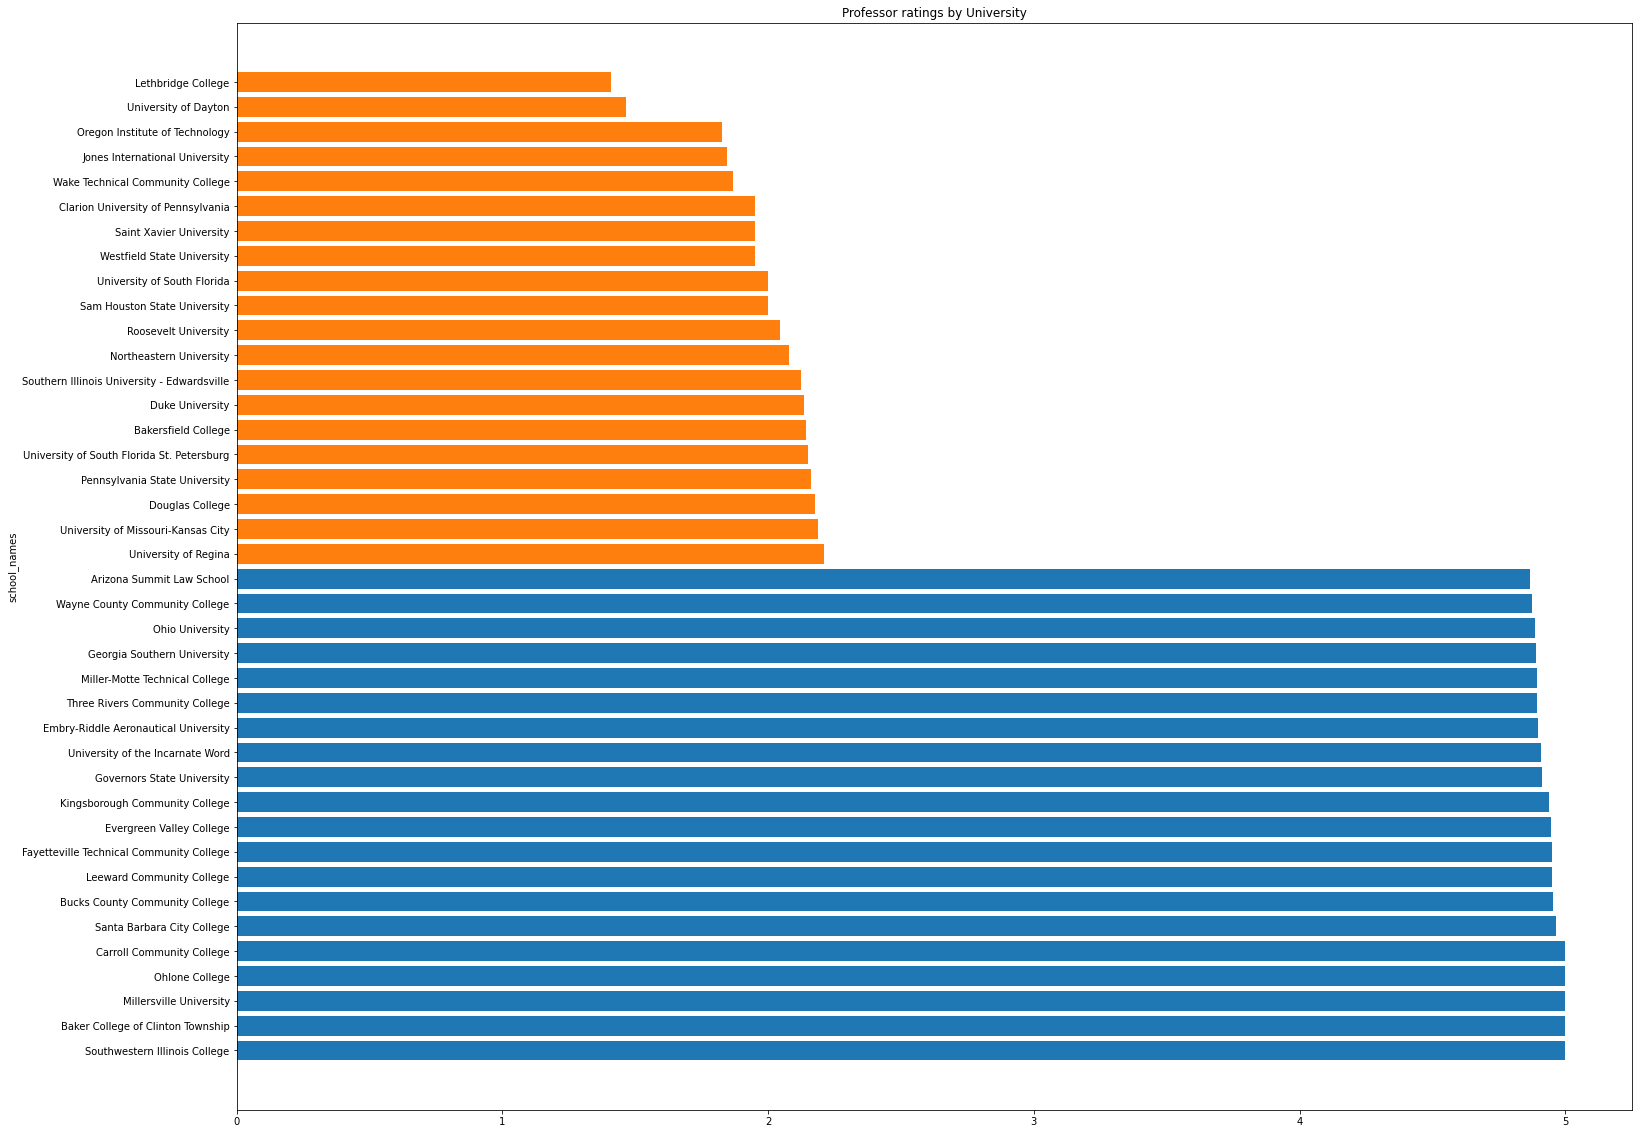

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25,20))
plt.barh(rank_schools.head(20).index,rank_schools.head(20).values)
plt.barh(rank_schools.tail(20).index,rank_schools.tail(20).values)

plt.ylabel("school_names")
plt.title("Professor ratings by University")
plt.savefig("plot.png")

## Analysis: Subjects and professor ratings

In [78]:
clean['name_onlines'].value_counts().describe()

count    6388.000000
mean        2.273168
std         3.791049
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       179.000000
Name: name_onlines, dtype: float64

 
* Frist of all 75% of the data counted less or equal to twice, which tells us most of time only one or two students like to give feedback on their subjects
* In the mean time, the mean is 2.37. Hence, subjects counted more than 2 times will be included.

In [79]:
criteria = clean['name_onlines'].value_counts()>2
subject = criteria[criteria == True].index
subjects = clean[clean['name_onlines'].isin(subject)]
subjects.head()

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
19,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2009,PHO101,4.5,1.0,None,0,0,None,None,0,0,No Comments,6
20,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2010,PHO101,5.0,1.0,None,0,0,None,None,1,0,"Very good teacher, easy going, very knowledgea...",6
23,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2009,PHO101,4.5,1.0,None,0,0,None,None,0,0,The best teacher I\'ve ever had. Learned lots ...,6
24,Dana Rush,0,Middle,Pacific Lutheran University,Physics department,Tacoma,WA,2013,PHYS110,3.0,3.0,None,0,0,None,None,0,0,Very boring class. Don\'t go into it thinking ...,7
26,Dana Rush,0,Middle,Pacific Lutheran University,Physics department,Tacoma,WA,2012,PHYS110,4.0,2.0,None,0,0,None,None,0,0,A nice professor to talk to outside of class a...,7


In [80]:
names_online = subjects.groupby('name_onlines').mean()['student_star'].sort_values(ascending=False)
print(names_online)

name_onlines
BSAD101     5.0
HIST1301    5.0
SOC304      5.0
AC210       5.0
HIS105      5.0
           ... 
PHYS132     1.0
CHEM1111    1.0
EEL3135     1.0
BSC2093C    1.0
ACS107      1.0
Name: student_star, Length: 1417, dtype: float64


In [81]:
names_online.head(10)

name_onlines
BSAD101     5.0
HIST1301    5.0
SOC304      5.0
AC210       5.0
HIS105      5.0
HIS249      5.0
HIS250      5.0
ASL2020     5.0
HIST106     5.0
PHI1600     5.0
Name: student_star, dtype: float64

In [82]:
names_online.tail(10)

name_onlines
ENG211      1.0
NURS200     1.0
QSTB202     1.0
ENGL202C    1.0
PHYS299     1.0
PHYS132     1.0
CHEM1111    1.0
EEL3135     1.0
BSC2093C    1.0
ACS107      1.0
Name: student_star, dtype: float64

 
* Students whom with strong feelings tend to provide their feedback on their subjects, and it largely affects their ratings for professors.


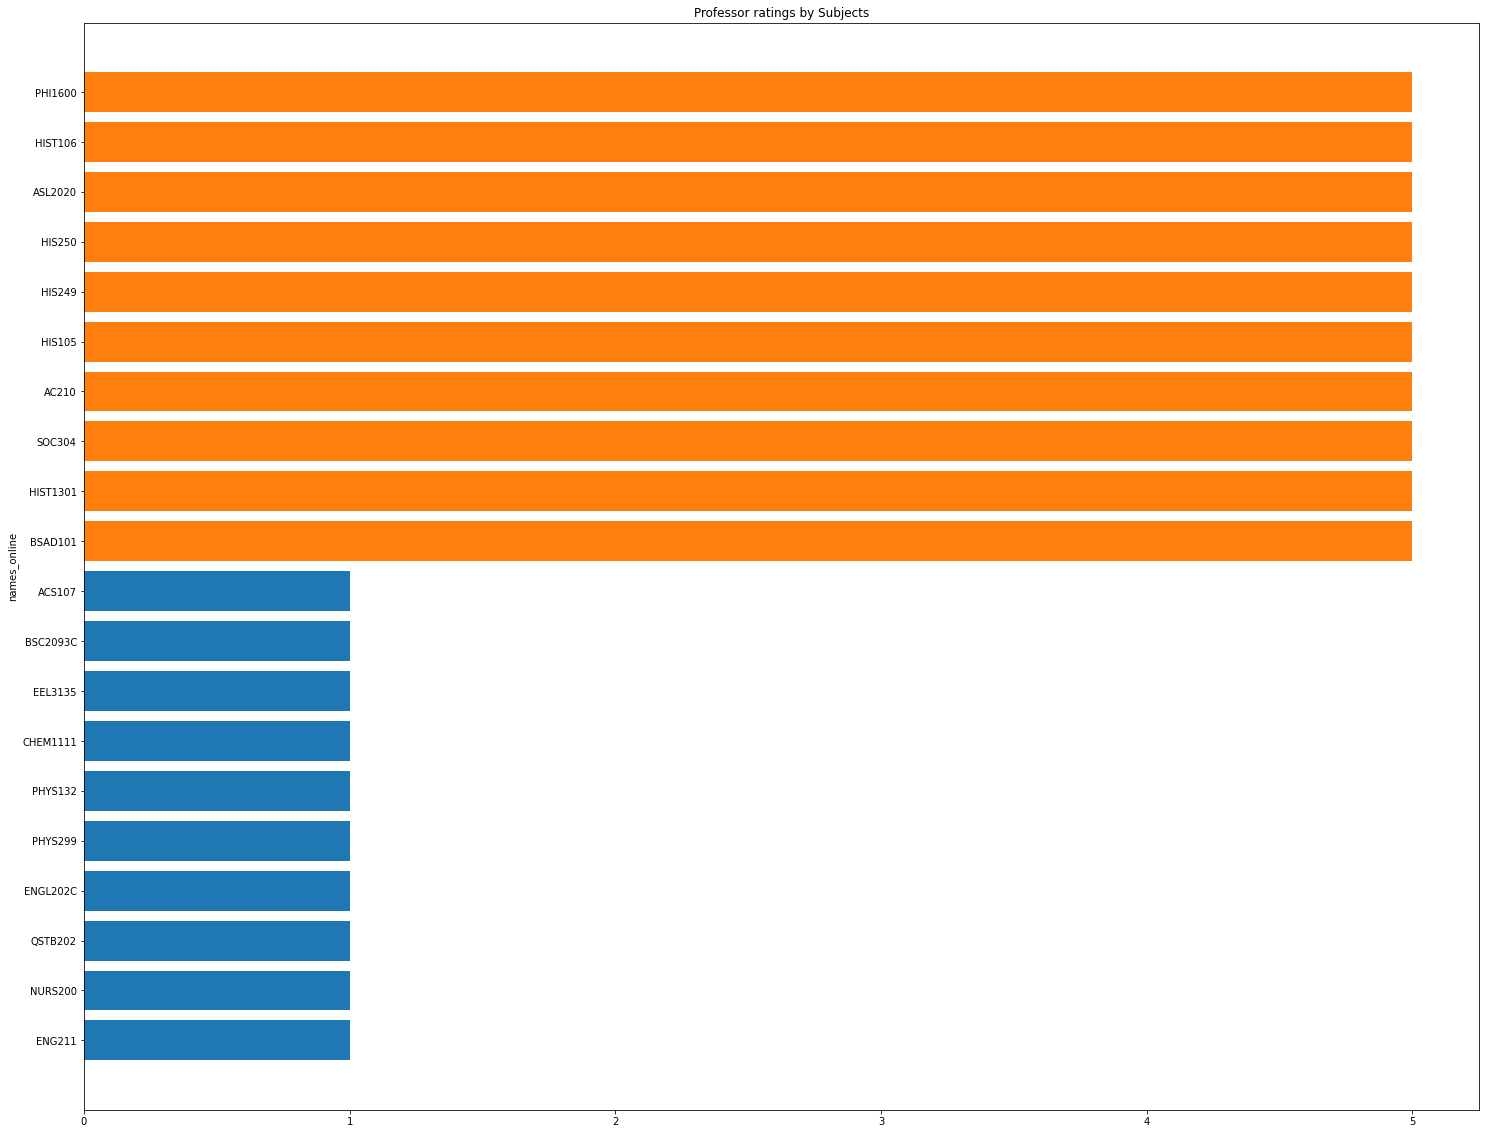

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25,20))
plt.barh(names_online.tail(10).index,names_online.tail(10))
plt.barh(names_online.head(10).index,names_online.head(10))

plt.ylabel("names_online")
plt.title("Professor ratings by Subjects")
plt.savefig("plot.png")

In the further work, since Discipline of study and university related features are non-numerical data. Therefore, other than use count_values(), text analytics, such as bag of words and TF-IDF could be used to analysis and build the linearRegression model. Especially, for the ['stu_tags']and['comments']. 

## Analysis:Helpfulness

In [84]:
clean['help_useful'].value_counts()

0    11282
1     1965
2      654
3      301
4      138
5       70
6       40
7       30
8       21
9       20
Name: help_useful, dtype: int64

In [85]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

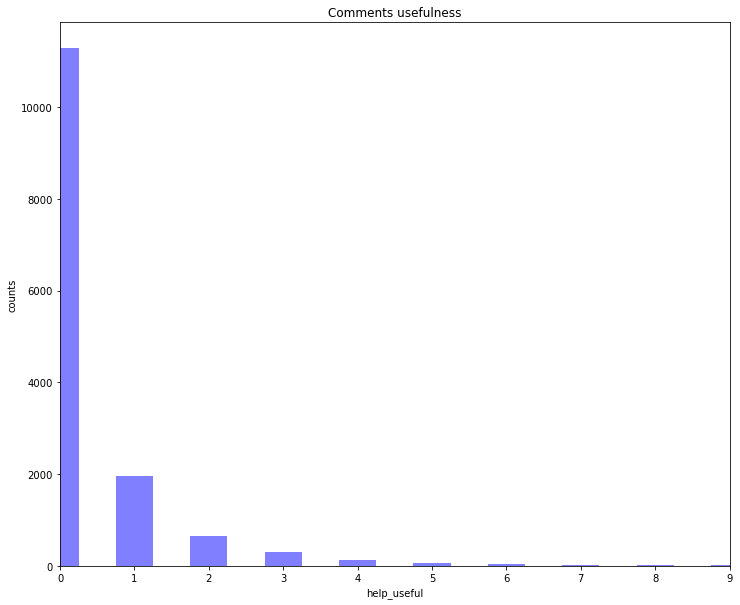

In [86]:
helpful = clean['help_useful']

plt.figure(figsize = (12,10))

plt.bar(np.arange(0,10),helpful.value_counts().sort_index(),
        alpha = 0.5, color = 'blue', width = 0.5)
plt.xlim((0,9))
x_ticks = np.arange(0,9)

plt.xlabel("help_useful")
plt.ylabel("counts")
plt.title('Comments usefulness')

plt.show()

In [87]:
clean['help_not_useful'].value_counts()

0    12734
1     1158
2      295
3      136
4       79
5       52
6       35
7       14
9       10
8        8
Name: help_not_useful, dtype: int64

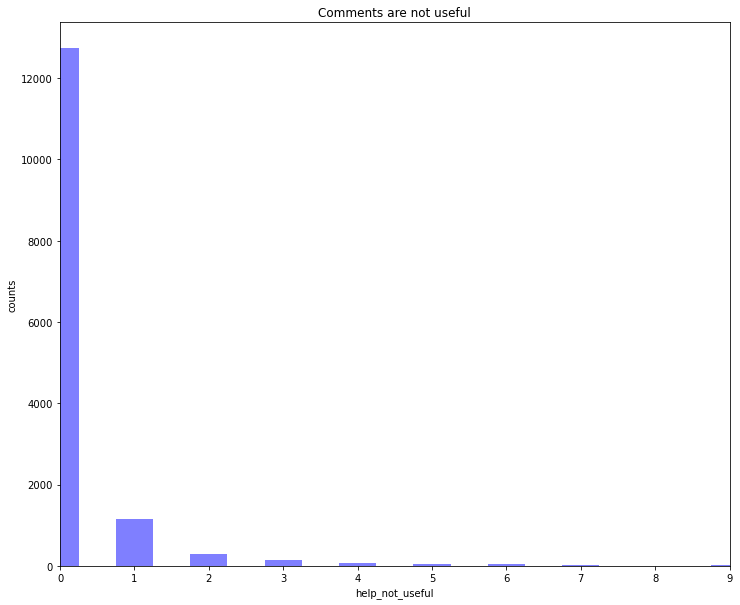

In [88]:
Not_helpful = clean['help_not_useful']

plt.figure(figsize = (12,10))

plt.bar(np.arange(0,10),Not_helpful.value_counts().sort_index(),
        alpha = 0.5, color = 'blue', width = 0.5)
plt.xlim((0,9))
x_ticks = np.arange(0,9)

plt.xlabel("help_not_useful")
plt.ylabel("counts")
plt.title('Comments are not useful')

plt.show()

In [89]:
helpful = clean['help_useful']
rank= clean['student_star']

table = pd.crosstab(helpful,rank).apply(lambda r: r/r.sum(), axis=1)

print(table)

student_star       1.0       1.5       2.0       2.5       3.0       3.5  \
help_useful                                                                
0             0.084205  0.039443  0.055487  0.037316  0.058943  0.051853   
1             0.124682  0.041730  0.066158  0.039186  0.057506  0.044784   
2             0.166667  0.047401  0.085627  0.036697  0.050459  0.038226   
3             0.212625  0.043189  0.096346  0.043189  0.066445  0.029900   
4             0.260870  0.072464  0.123188  0.028986  0.043478  0.021739   
5             0.342857  0.085714  0.128571  0.042857  0.057143  0.042857   
6             0.450000  0.075000  0.100000  0.050000  0.000000  0.025000   
7             0.533333  0.166667  0.133333  0.033333  0.000000  0.000000   
8             0.476190  0.095238  0.142857  0.000000  0.047619  0.000000   
9             0.750000  0.050000  0.050000  0.100000  0.000000  0.000000   

student_star       4.0       4.5       5.0  
help_useful                               

In [90]:
Not_helpful = clean['help_not_useful']
rank= clean['student_star']

table = pd.crosstab(Not_helpful,rank).apply(lambda r: r/r.sum(), axis=1)

print(table)

student_star          1.0       1.5       2.0       2.5       3.0       3.5  \
help_not_useful                                                               
0                0.095964  0.039736  0.056856  0.037694  0.056934  0.049317   
1                0.140760  0.048359  0.079447  0.032815  0.069085  0.046632   
2                0.142373  0.054237  0.081356  0.040678  0.061017  0.054237   
3                0.183824  0.073529  0.132353  0.036765  0.073529  0.036765   
4                0.202532  0.075949  0.151899  0.075949  0.088608  0.025316   
5                0.173077  0.076923  0.076923  0.019231  0.019231  0.057692   
6                0.085714  0.000000  0.085714  0.142857  0.000000  0.142857   
7                0.357143  0.000000  0.071429  0.000000  0.071429  0.071429   
8                0.125000  0.000000  0.125000  0.000000  0.000000  0.000000   
9                0.100000  0.000000  0.000000  0.000000  0.000000  0.000000   

student_star          4.0       4.5       5.0  
hel

In [91]:
clean.corr()["help_useful"]["student_star"]

-0.1624855556645838

In [92]:
clean.cov()["help_useful"]["student_star"]

-0.22984747984442785

In [93]:
clean.corr()["help_not_useful"]["student_star"]

-0.06674179539303018

In [94]:
clean.cov()["help_not_useful"]["student_star"]

-0.07248662429239458

* On scale 0 to 9, 5 to 9 are studnets found commets are helpful or very helpful. Among this group most of the students gives 1.0 for rating. As in the 5.0 rating group, most of the students give low score on help_useful.

* help_useful and help_not_useful both has a low negative correlation with student_star.

* help_useful has a stronger correlation than help_not_useful. Therefore, when we analyse factors that affect professors' rating, the help_useful should be taken into consideration



## Analysis:Attence

Mandatory attendance is nearly 4 times for the not mandatory attendance.
Yet, the mandatory attendance group has an average rating of 3.83 which is higher than 3.66 for the not mandatory attendance.
For professors who have attendance requirements, students were relatively satisfied, which might because they learned from the course and got good grades

In [95]:
clean['attence'].value_counts()

Mandatory        3081
Not Mandatory     876
Name: attence, dtype: int64

In [96]:
clean['attence'] = clean['attence'].fillna('unknown')

In [97]:
re_attence = clean['attence'].value_counts()

In [98]:
attence_new = clean.groupby('attence').mean()['student_star'].sort_values(ascending= False)
attence_new.sort_index()

attence
Mandatory        3.822623
Not Mandatory    3.726027
unknown          3.795579
Name: student_star, dtype: float64

In [99]:
x = clean['attence']
y = clean['student_star']
table = pd.crosstab(x, y)
print(table)

student_star    1.0  1.5  2.0  2.5  3.0  3.5   4.0   4.5   5.0
attence                                                       
Mandatory       385   61  207   67  177  107   435   272  1370
Not Mandatory    99   31   62   24   73   41   126    64   356
unknown        1003  506  610  456  592  566  1176  1523  4132


## Analysis:Grades

In [100]:
clean['grades'].value_counts()

A           1173
A+           521
B+           341
B            340
A-           306
Not          186
C             90
B-            75
C+            69
WD            43
F             31
D             22
C-            22
INC           15
P             15
D+            12
Audit/No      11
D-             4
Name: grades, dtype: int64

In [101]:
clean['grades'] = clean['grades']

The current categories of grades are cluttered. Thus, we re-defined the grades into 7 categories.

In [102]:
def review_grades (val): 
    if "A" in val and len(val)<=3:
        return '6'
    elif "B" in val: 
        return '5'
    elif "C" in val: 
        return '4'
    elif "D" in val: 
        return '3'
    elif "P" in val: 
        return '2'
    elif "F" in val: 
        return '1'
    else:
        return '0'

In [103]:
clean['grades']=clean['grades'].astype('str').apply(review_grades).astype('int')

In [104]:
clean['grades'].value_counts().sort_values()

2       15
1       31
3       81
4      196
5      756
6     2000
0    11442
Name: grades, dtype: int64

In [105]:
grade = clean['grades']
rank= clean['student_star']

table = pd.crosstab(grade,rank).apply(lambda r: r/r.sum(), axis=1)

print(table)

student_star       1.0       1.5       2.0       2.5       3.0       3.5  \
grades                                                                     
0             0.106275  0.046758  0.060392  0.042300  0.055847  0.051564   
1             0.483871  0.032258  0.225806  0.064516  0.096774  0.000000   
2             0.066667  0.133333  0.000000  0.000000  0.133333  0.066667   
3             0.629630  0.086420  0.172840  0.024691  0.037037  0.024691   
4             0.229592  0.056122  0.158163  0.040816  0.173469  0.025510   
5             0.099206  0.031746  0.100529  0.026455  0.080688  0.064815   
6             0.042000  0.009000  0.030000  0.015500  0.050000  0.033500   

student_star       4.0       4.5       5.0  
grades                                      
0             0.113267  0.138263  0.385335  
1             0.000000  0.000000  0.096774  
2             0.066667  0.066667  0.466667  
3             0.012346  0.000000  0.012346  
4             0.132653  0.056122  0.127551  


In [106]:
clean.corr()["grades"]["student_star"]

0.09490639470666982

In [107]:
clean.cov()["grades"]["student_star"]

0.30331653235942296

The correlation and covariance analysis shows that there is a low positive relationship between grades and professtors' rating.
We could clearly observe this trend in students who give score 1 and 5 in student_star.

In [108]:
from scipy.stats import pearsonr
stat, p = pearsonr(clean['student_star'],clean['grades'])
stat,p

(0.09490639470667034, 2.0613482277642386e-30)

## Analysis: Reported difficulty

First, we are going to make a histogram to show us the overall distribution of the student rating for both difficulty(black) and their professor(red)

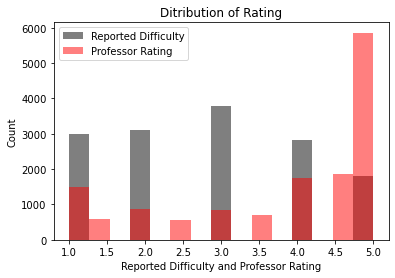

In [109]:
# data need to add into our histogram

x = clean.student_difficult
y = clean.student_star

# make a histogram plot
plt.hist(x,bins=15,label="Reported Difficulty",color="black", alpha = 0.5)
plt.hist(y,bins=15,label="Professor Rating",color="red",alpha= 0.5)
plt.xlabel('Reported Difficulty and Professor Rating')
plt.ylabel('Count')
plt.title('Ditribution of Rating')
plt.legend()
plt.savefig('distribution')

Dicussion:
From the histogram, the distribution of rating difficulty is smmother than rating their professor. The more even distribution of rating difficulty may be resulted by the way to rate the difficulty (integer), or the increasing level of courses students would take. We still can see that the profortion of students who rate their professor a high grade from 4-5 is highest.

### Observe the tendency by using scatter plot

The shortage of histogram above is we can not find out a trend that how students rate the difficulty related to rate their professor. So, here we are going to focus on the relation between students rate their professor and difficulty by using scatter plot.

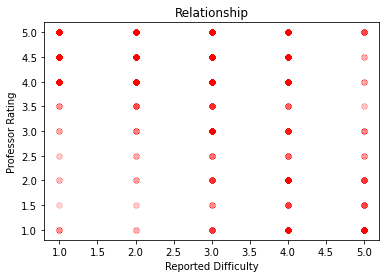

In [110]:
# define x-axis and y-axis

x = clean.student_difficult
y = clean.student_star

# make a scatter plot to find out the relation

plt.scatter(x,y, alpha = 0.001960784313726, c = 'red')
plt.xlabel('Reported Difficulty')
plt.ylabel('Professor Rating')
plt.title('Relationship')
plt.savefig('Relation')

Disscussion:
Since the ranges of difficulty rate and professor rate are same and the data is not continuous, so we can oberserve the scatter plot by focusing on the transparency of the dot. From the scatter plot, we can see that students who rate low level of difficulty from 1 to 2, have a tendency to rate a higher grade of their proffessor, and students rate highest level of difficulty of 5 have a tendency to rate a lower grade to their professor. 

### Check the average and find the correlation

Due to the limitation of the scatter plot avlove, We are not able to get the tendency for students who rate a difficulty form 3-4. So, here we focus on the overall correlation and individual mean.

In [111]:
## find the mean of difficulty and professor rate
clean[["student_difficult", "student_star"]].mean()

student_difficult    2.817437
student_star         3.797121
dtype: float64

In [112]:
## find the correlation between them
clean.corr()['student_star']["student_difficult"]

-0.4498880443907792

Discussion:
As we mentioned in part(2), large proportion of students likely rate their professor a high grade, the overall professor rate is 3.77. The average difficulty is 2.85. The negative 0.46 correlation between difficulty and student rate means that as the increasing of difficulty, students will rate their professor a lower grade. But since the number is not big, I would say that the correlation between them are moderate related.

### Conclusion

In conclusion, without considering other factors, the reported difficulty are going to negatively impact the professor rating, and the strength is moderate. Due to the situation we have, and limitation said above, we are not going to try line plot and bar plot. And our group are going to further explore the factors that may affect the professor rating by using the data was given. For example, we are going to use multlinear regression model to see the overall factors may impact professor rating

## Analysis: Department

In [113]:
clean['department_name'].value_counts().describe()

count     236.000000
mean       61.529661
std       175.272418
min         1.000000
25%         4.000000
50%        12.000000
75%        33.500000
max      1846.000000
Name: department_name, dtype: float64

In [114]:
criteria_department = clean['department_name'].value_counts()>3
department = criteria_department[criteria_department == True].index
department_subject = clean[clean['department_name'].isin(department)]
department_subject.head(10)


,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
7,Gyda Swayney,0,Middle,University of Montana - Missoula,Psychology department,Missoula,MT,2010,PSYX352,3.0,2.0,unknown,0,0,0,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2013,HHP226,1.0,4.0,unknown,0,0,0,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
11,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN483,5.0,2.0,Mandatory,1,0,0,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN484,5.0,3.0,Mandatory,1,0,0,None,0,0,Steph was very helpful and cared about our exp...,4
17,Lawrence MacDonnell,1,Middle,St. Francis Xavier University,History department,Antigonish,NS,2009,HIST242T,4.5,3.0,unknown,0,0,0,None,0,0,"Wow. Have to say, we need more profs like this...",5
18,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2012,PHO26,5.0,1.0,unknown,0,0,0,None,0,0,He is a GREAT instructor. Had him for B&W phot...,6
19,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2009,PHO101,4.5,1.0,unknown,0,0,0,None,0,0,No Comments,6
20,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2010,PHO101,5.0,1.0,unknown,0,0,0,None,1,0,"Very good teacher, easy going, very knowledgea...",6
21,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2014,PHO150,5.0,1.0,unknown,1,0,6,None,0,0,he is an amazing teacher. if you are looking f...,6
22,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2017,PHO150,2.0,3.0,Mandatory,0,0,0,GRADED BY FEW THINGS BEWARE OF POP QUIZZES S...,0,1,Not respectful when you ask questions.,6


In [115]:
department_subject['department_name'].value_counts()

English department                       1846
Mathematics department                   1166
Psychology department                     837
Biology department                        695
History department                        555
                                         ... 
Natural Sciences department                 4
Business Law department                     4
Physical Sciences department                4
Civil & Const Engineering department        4
Air Conditioning & Refrig. department       4
Name: department_name, Length: 185, dtype: int64

In [116]:
rank_department = department_subject.groupby('department_name').mean()['student_star'].sort_values(ascending= False)
print(rank_department)

department_name
Ethnic Studies department                 5.000000
Industrial Technology department          5.000000
Developmental Studies department          5.000000
Behavioral Sciences department            4.928571
New Media Art department                  4.923077
                                            ...   
Supplemental Instruction department       2.250000
Civil & Const Engineering department      2.125000
Academic Skills Development department    2.113636
Merchandising department                  2.083333
Modern Languages department               1.875000
Name: student_star, Length: 185, dtype: float64


In [117]:
rank_department.head(10)

department_name
Ethnic Studies department                5.000000
Industrial Technology department         5.000000
Developmental Studies department         5.000000
Behavioral Sciences department           4.928571
New Media Art department                 4.923077
Biomedical department                    4.892857
Aviation Pilot Instructor department     4.875000
Air Conditioning & Refrig. department    4.875000
Advertising Design department            4.750000
Human Services department                4.750000
Name: student_star, dtype: float64

In [118]:
rank_department.tail(10)

department_name
Reading department                           2.458333
Operations & Mgmt Info Systems department    2.423077
Applied Mathematics department               2.394737
Art & Art History department                 2.375000
German & Scandinavian department             2.375000
Supplemental Instruction department          2.250000
Civil & Const Engineering department         2.125000
Academic Skills Development department       2.113636
Merchandising department                     2.083333
Modern Languages department                  1.875000
Name: student_star, dtype: float64

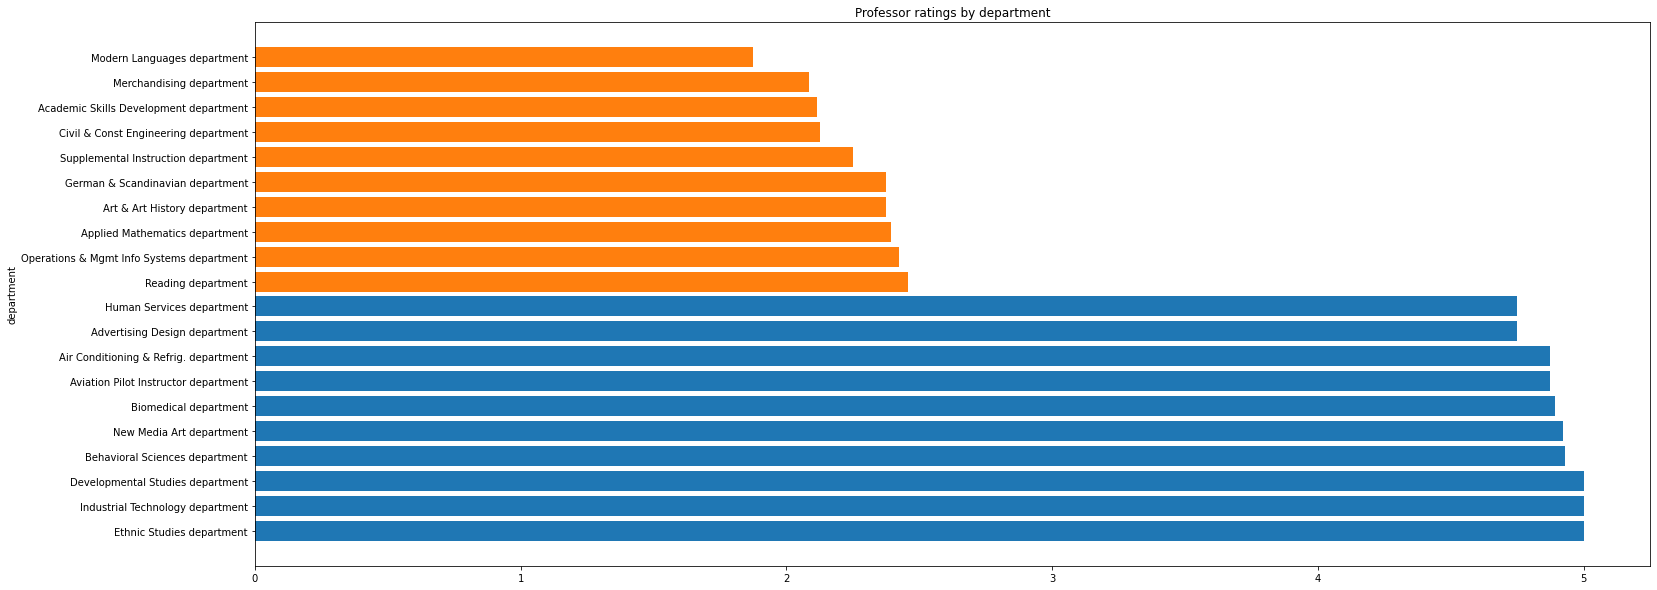

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))
plt.barh(rank_department.head(10).index,rank_department.head(10).values)
plt.barh(rank_department.tail(10).index,rank_department.tail(10).values)
plt.ylabel("department")
plt.title("Professor ratings by department")
plt.savefig("123.png")

## Analysis: Local name

In [120]:
clean['local_name'].value_counts().describe()

count    682.000000
mean      21.291789
std       29.566743
min        1.000000
25%        4.000000
50%       12.000000
75%       26.750000
max      430.000000
Name: local_name, dtype: float64

In [121]:
criteria_local = clean['local_name'].value_counts()>4
local = criteria_local[criteria_local == True].index
local_subject = clean[clean['local_name'].isin(local)]
local_subject.head(10)


,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,1,Middle,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,2010,UP347,3.5,2.0,unknown,0,0,0,None,0,0,"Good guy, laid back and interested in his fiel...",0
7,Gyda Swayney,0,Middle,University of Montana - Missoula,Psychology department,Missoula,MT,2010,PSYX352,3.0,2.0,unknown,0,0,0,None,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2013,HHP226,1.0,4.0,unknown,0,0,0,None,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
11,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN483,5.0,2.0,Mandatory,1,0,0,BEWARE OF POP QUIZZES EXTRA CREDIT SKIP CLAS...,0,0,One of the best classes I took at UM.,4
12,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN484,5.0,3.0,Mandatory,1,0,0,None,0,0,Steph was very helpful and cared about our exp...,4
17,Lawrence MacDonnell,1,Middle,St. Francis Xavier University,History department,Antigonish,NS,2009,HIST242T,4.5,3.0,unknown,0,0,0,None,0,0,"Wow. Have to say, we need more profs like this...",5
18,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2012,PHO26,5.0,1.0,unknown,0,0,0,None,0,0,He is a GREAT instructor. Had him for B&W phot...,6
19,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2009,PHO101,4.5,1.0,unknown,0,0,0,None,0,0,No Comments,6
20,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2010,PHO101,5.0,1.0,unknown,0,0,0,None,1,0,"Very good teacher, easy going, very knowledgea...",6
21,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2014,PHO150,5.0,1.0,unknown,1,0,6,None,0,0,he is an amazing teacher. if you are looking f...,6


In [122]:
local_subject['local_name'].value_counts()

 New York           430
 Chicago            167
 Fullerton          141
 Edmonton           138
 Brooklyn           138
                   ... 
 Los Altos Hills      5
 Winter Park          5
 Harrison             5
 Vineland             5
 Ferrum               5
Name: local_name, Length: 508, dtype: int64

In [123]:
rank_local = local_subject.groupby('local_name').mean()['student_star'].sort_values(ascending= False)
print(rank_local)

local_name
 Clinton Township    5.000000
 Jamestown           5.000000
 Orangeburg          5.000000
 Allendale           5.000000
 Millersville        5.000000
                       ...   
 Klamath Falls       1.825000
 Mays Landing        1.625000
 Fayette             1.428571
 Lethbridge          1.409091
 Pensacola           1.388889
Name: student_star, Length: 508, dtype: float64


In [124]:
rank_local.head(10)

local_name
 Clinton Township    5.000000
 Jamestown           5.000000
 Orangeburg          5.000000
 Allendale           5.000000
 Millersville        5.000000
 Naperville          5.000000
 Fremont             5.000000
 Newtown             4.952381
 Pearl City          4.950000
 Brookline           4.916667
Name: student_star, dtype: float64

In [125]:
rank_local.tail(10)

local_name
 Huntsville       2.000000
 Westfield        1.950000
 Clarion          1.950000
 Oklahoma City    1.944444
 Centennial       1.846154
 Klamath Falls    1.825000
 Mays Landing     1.625000
 Fayette          1.428571
 Lethbridge       1.409091
 Pensacola        1.388889
Name: student_star, dtype: float64

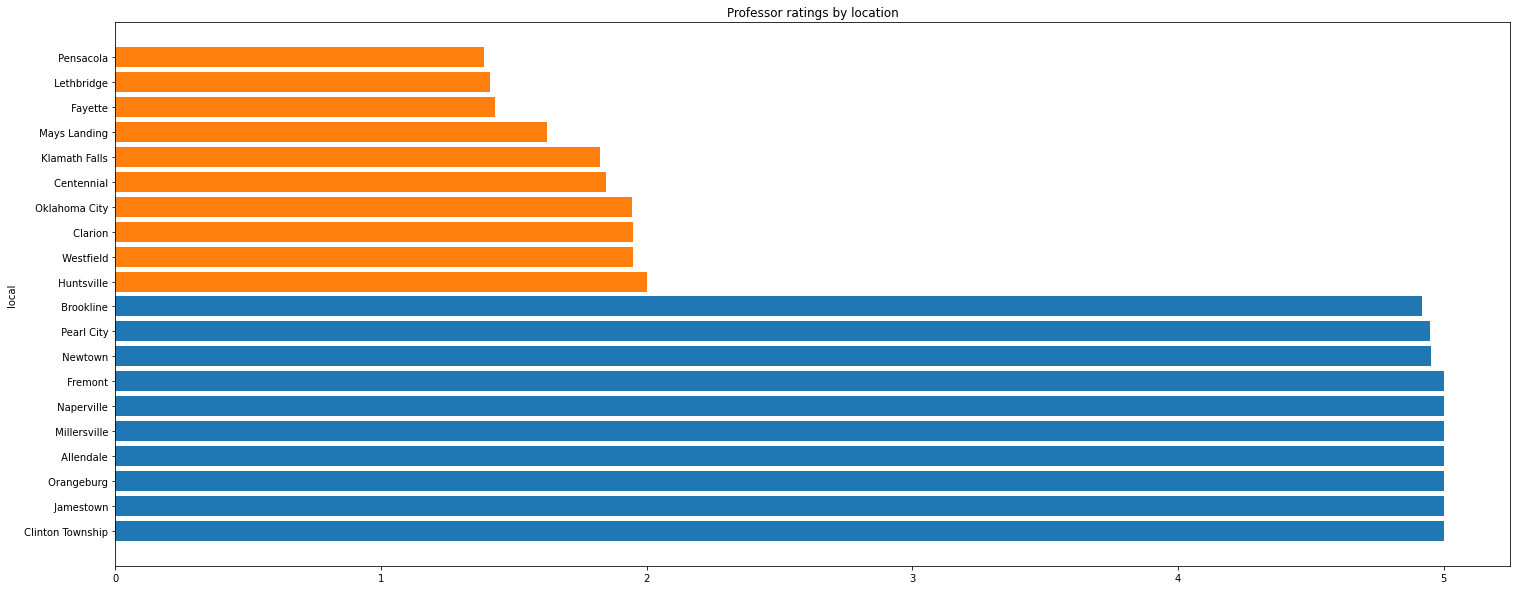

In [126]:
plt.figure(figsize = (25,10))
plt.barh(rank_local.head(10).index,rank_local.head(10).values)
plt.barh(rank_local.tail(10).index,rank_local.tail(10).values)
plt.ylabel("local")
plt.title("Professor ratings by location")
plt.savefig("345.png")

## Analysis: state name

In [127]:
clean['state_name'].value_counts().describe()

count      74.000000
mean      196.229730
std       384.847899
min         1.000000
25%        19.250000
50%        63.000000
75%       245.000000
max      2679.000000
Name: state_name, dtype: float64

In [128]:
criteria_state = clean['state_name'].value_counts()>31
state = criteria_state[criteria_state == True].index
state_subject = clean[clean['state_name'].isin(state)]
state_subject.head(20)


,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,1,Middle,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,2010,UP347,3.5,2.0,unknown,0,0,0,None,0,0,"Good guy, laid back and interested in his fiel...",0
18,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2012,PHO26,5.0,1.0,unknown,0,0,0,None,0,0,He is a GREAT instructor. Had him for B&W phot...,6
19,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2009,PHO101,4.5,1.0,unknown,0,0,0,None,0,0,No Comments,6
20,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2010,PHO101,5.0,1.0,unknown,0,0,0,None,1,0,"Very good teacher, easy going, very knowledgea...",6
21,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2014,PHO150,5.0,1.0,unknown,1,0,6,None,0,0,he is an amazing teacher. if you are looking f...,6
22,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2017,PHO150,2.0,3.0,Mandatory,0,0,0,GRADED BY FEW THINGS BEWARE OF POP QUIZZES S...,0,1,Not respectful when you ask questions.,6
23,David Burke,1,Middle,Pennsylvania College of Technology,Graphic Arts department,Williamsport,PA,2009,PHO101,4.5,1.0,unknown,0,0,0,None,0,0,The best teacher I\'ve ever had. Learned lots ...,6
24,Dana Rush,0,Middle,Pacific Lutheran University,Physics department,Tacoma,WA,2013,PHYS110,3.0,3.0,unknown,0,0,0,None,0,0,Very boring class. Don\'t go into it thinking ...,7
25,Dana Rush,0,Young,Pacific Lutheran University,Physics department,Tacoma,WA,2009,PHYS210,3.5,3.0,unknown,0,0,0,None,0,0,"Dana is as quirky as they come. His dramatic ""...",7
26,Dana Rush,0,Middle,Pacific Lutheran University,Physics department,Tacoma,WA,2012,PHYS110,4.0,2.0,unknown,0,0,0,None,0,0,A nice professor to talk to outside of class a...,7


In [129]:
state_subject['state_name'].value_counts()

 CA            2679
 NY            1755
 FL             641
 TX             594
 MI             523
 OH             508
 IL             492
 PA             448
 MD             419
 WA             395
 VA             379
 NJ             374
 AZ             364
 CT             342
 MA             338
 ON             338
 OR             266
 NC             262
 GA             258
 AB             206
 MN             198
 WI             189
 KY             188
 SC             182
 BC             157
 MO             139
 LA             128
 TN             127
 AL             126
 CO             105
 IN              98
 AR              94
 WV              76
 DE              73
 ID              63
 SK              63
 RI              63
 OK              63
 KS              60
 NM              57
 UT              57
 NV              55
 IA              52
 QC              48
 NH              44
 MB              41
 Northridge      41
 NE              38
 AK              37
 NB              34


In [130]:
rank_state = state_subject.groupby('state_name').mean()['student_star'].sort_values(ascending= False)
print(rank_state)

state_name
 NB            4.367647
 IN            4.270408
 RI            4.214286
 DE            4.191781
 CT            4.133041
 AZ            4.059066
 ID            4.055556
 QC            4.031250
 AR            4.026596
 NV            3.990909
 WV            3.986842
 WI            3.984127
 UT            3.982456
 MD            3.967780
 NY            3.960399
 GA            3.934109
 OH            3.896654
 TN            3.870079
 Northridge    3.865854
 AL            3.865079
 CA            3.863195
 SC            3.854396
 ON            3.840237
 VA            3.816623
 ND            3.794118
 IL            3.787602
 KY            3.771277
 CO            3.766667
 OK            3.746032
 NC            3.740458
 MI            3.738050
 PA            3.731027
 IA            3.730769
 MA            3.693787
 TX            3.687710
 AB            3.667476
 NJ            3.636364
 LA            3.617188
 ME            3.606061
 WA            3.568354
 MN            3.537879
 FL  

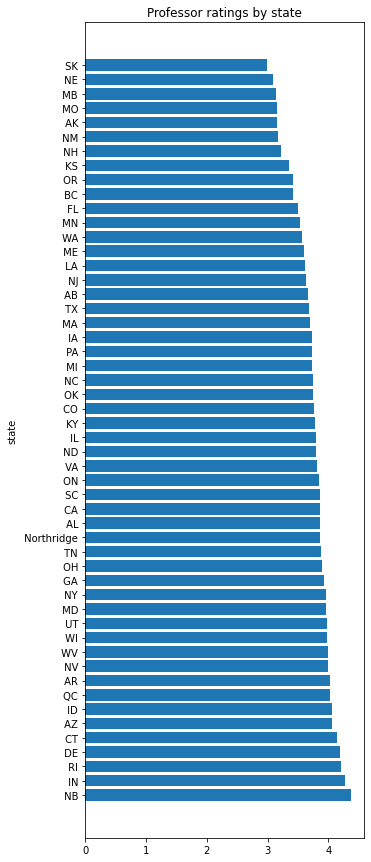

In [131]:
plt.figure(figsize = (5,15))
plt.barh(rank_state.index,rank_state.values)

plt.ylabel("state")
plt.title("Professor ratings by state")
plt.savefig("678.png")

## Analysis:Student_tags and professor ratings

In [132]:
clean['stu_tags'].value_counts().describe()

count    1680.000000
mean        2.260119
std         3.299009
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        73.000000
Name: stu_tags, dtype: float64

In [133]:
clean["stu_tags"].isnull().sum()

10724

In [134]:
clean["stu_tags"] = clean["stu_tags"].fillna("Unknown")

In [135]:
criteria = clean['stu_tags'].value_counts()>1
tags = criteria[criteria == True].index
student_tag = clean[clean['stu_tags'].isin(tags)]
student_tag.head()

,professor_name,gender,age,school_name,department_name,local_name,state_name,post_date,name_onlines,student_star,student_difficult,attence,for_credits,would_take_agains,grades,stu_tags,help_useful,help_not_useful,comments,prof_id
0,Robert Olshansky,1,Middle,University Of Illinois at Urbana-Champaign,Urban & Regional Planning department,Champaign\xe2\x80\x93Urbana,IL,2010,UP347,3.5,2.0,unknown,0,0,0,Unknown,0,0,"Good guy, laid back and interested in his fiel...",0
7,Gyda Swayney,0,Middle,University of Montana - Missoula,Psychology department,Missoula,MT,2010,PSYX352,3.0,2.0,unknown,0,0,0,Unknown,0,0,Boo. When I took multicultural psych from Dr. ...,3
8,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2013,HHP226,1.0,4.0,unknown,0,0,0,Unknown,2,0,"Stephanie ALWAYS had a mad or bored or ""I coul...",4
12,Stephanie Domitrovich,0,Young,University of Montana - Missoula,Health & Human Performance department,Missoula,MT,2015,KIN484,5.0,3.0,Mandatory,1,0,0,Unknown,0,0,Steph was very helpful and cared about our exp...,4
17,Lawrence MacDonnell,1,Middle,St. Francis Xavier University,History department,Antigonish,NS,2009,HIST242T,4.5,3.0,unknown,0,0,0,Unknown,0,0,"Wow. Have to say, we need more profs like this...",5


In [136]:
tag_new = student_tag.groupby('stu_tags').mean()['student_star'].sort_values(ascending= False)
tag_new.sort_index()

stu_tags
ACCESSIBLE OUTSIDE CLASS                                     3.666667
ACCESSIBLE OUTSIDE CLASS  AMAZING LECTURES  HILARIOUS        5.000000
ACCESSIBLE OUTSIDE CLASS  AMAZING LECTURES  INSPIRATIONAL    5.000000
ACCESSIBLE OUTSIDE CLASS  CARING                             5.000000
ACCESSIBLE OUTSIDE CLASS  CARING  GIVES GOOD FEEDBACK        4.666667
                                                               ...   
TOUGH GRADER  TEST HEAVY                                     1.000000
TOUGH GRADER  TEST HEAVY  GROUP PROJECTS                     2.000000
TOUGH GRADER  TEST HEAVY  LECTURE HEAVY                      1.000000
TOUGH GRADER  TEST HEAVY  SKIP CLASS? YOU WON\'T PASS.       2.000000
Unknown                                                      3.767391
Name: student_star, Length: 689, dtype: float64

In [137]:
tag_new.describe()

count    689.000000
mean       3.916382
std        1.191744
min        1.000000
25%        3.000000
50%        4.500000
75%        4.875000
max        5.000000
Name: student_star, dtype: float64

In [138]:
tag_new.head(10)

stu_tags
GRADED BY FEW THINGS  CARING  CLEAR GRADING CRITERIA            5.0
EXTRA CREDIT  AMAZING LECTURES  INSPIRATIONAL                   5.0
SKIP CLASS? YOU WON\'T PASS.  AMAZING LECTURES  CARING          5.0
EXTRA CREDIT  RESPECTED  SKIP CLASS? YOU WON\'T PASS.           5.0
CARING  INSPIRATIONAL  HILARIOUS                                5.0
EXTRA CREDIT  RESPECTED  GIVES GOOD FEEDBACK                    5.0
LECTURE HEAVY  PARTICIPATION MATTERS  CLEAR GRADING CRITERIA    5.0
EXTRA CREDIT  CARING  AMAZING LECTURES                          5.0
EXTRA CREDIT  CARING                                            5.0
RESPECTED  PARTICIPATION MATTERS  CARING                        5.0
Name: student_star, dtype: float64

In [139]:
tag_new.tail(10)

stu_tags
LOTS OF HOMEWORK  TOUGH GRADER  BEWARE OF POP QUIZZES             1.0
GRADED BY FEW THINGS  TOUGH GRADER                                1.0
GRADED BY FEW THINGS  TEST HEAVY  LECTURE HEAVY                   1.0
LECTURE HEAVY  TEST HEAVY  TOUGH GRADER                           1.0
LOTS OF HOMEWORK  GET READY TO READ  TEST HEAVY                   1.0
SO MANY PAPERS  LOTS OF HOMEWORK  SKIP CLASS? YOU WON\'T PASS.    1.0
GET READY TO READ  SKIP CLASS? YOU WON\'T PASS.  LECTURE HEAVY    1.0
TOUGH GRADER  LOTS OF HOMEWORK  LECTURE HEAVY                     1.0
TOUGH GRADER  LOTS OF HOMEWORK  GET READY TO READ                 1.0
TEST HEAVY  LECTURE HEAVY  TOUGH GRADER                           1.0
Name: student_star, dtype: float64

Tags that students used in the rating seems highly reflect the rating score

with 5.0 rating often shows same features, such as hilarious and amazing lectures. It also linked with attendance as the tag 'SKIP CLASS? YOU WON'T PASS.'
with 1.0 rating often shows same features as well, mostly complains about the discipline and heavy workload.

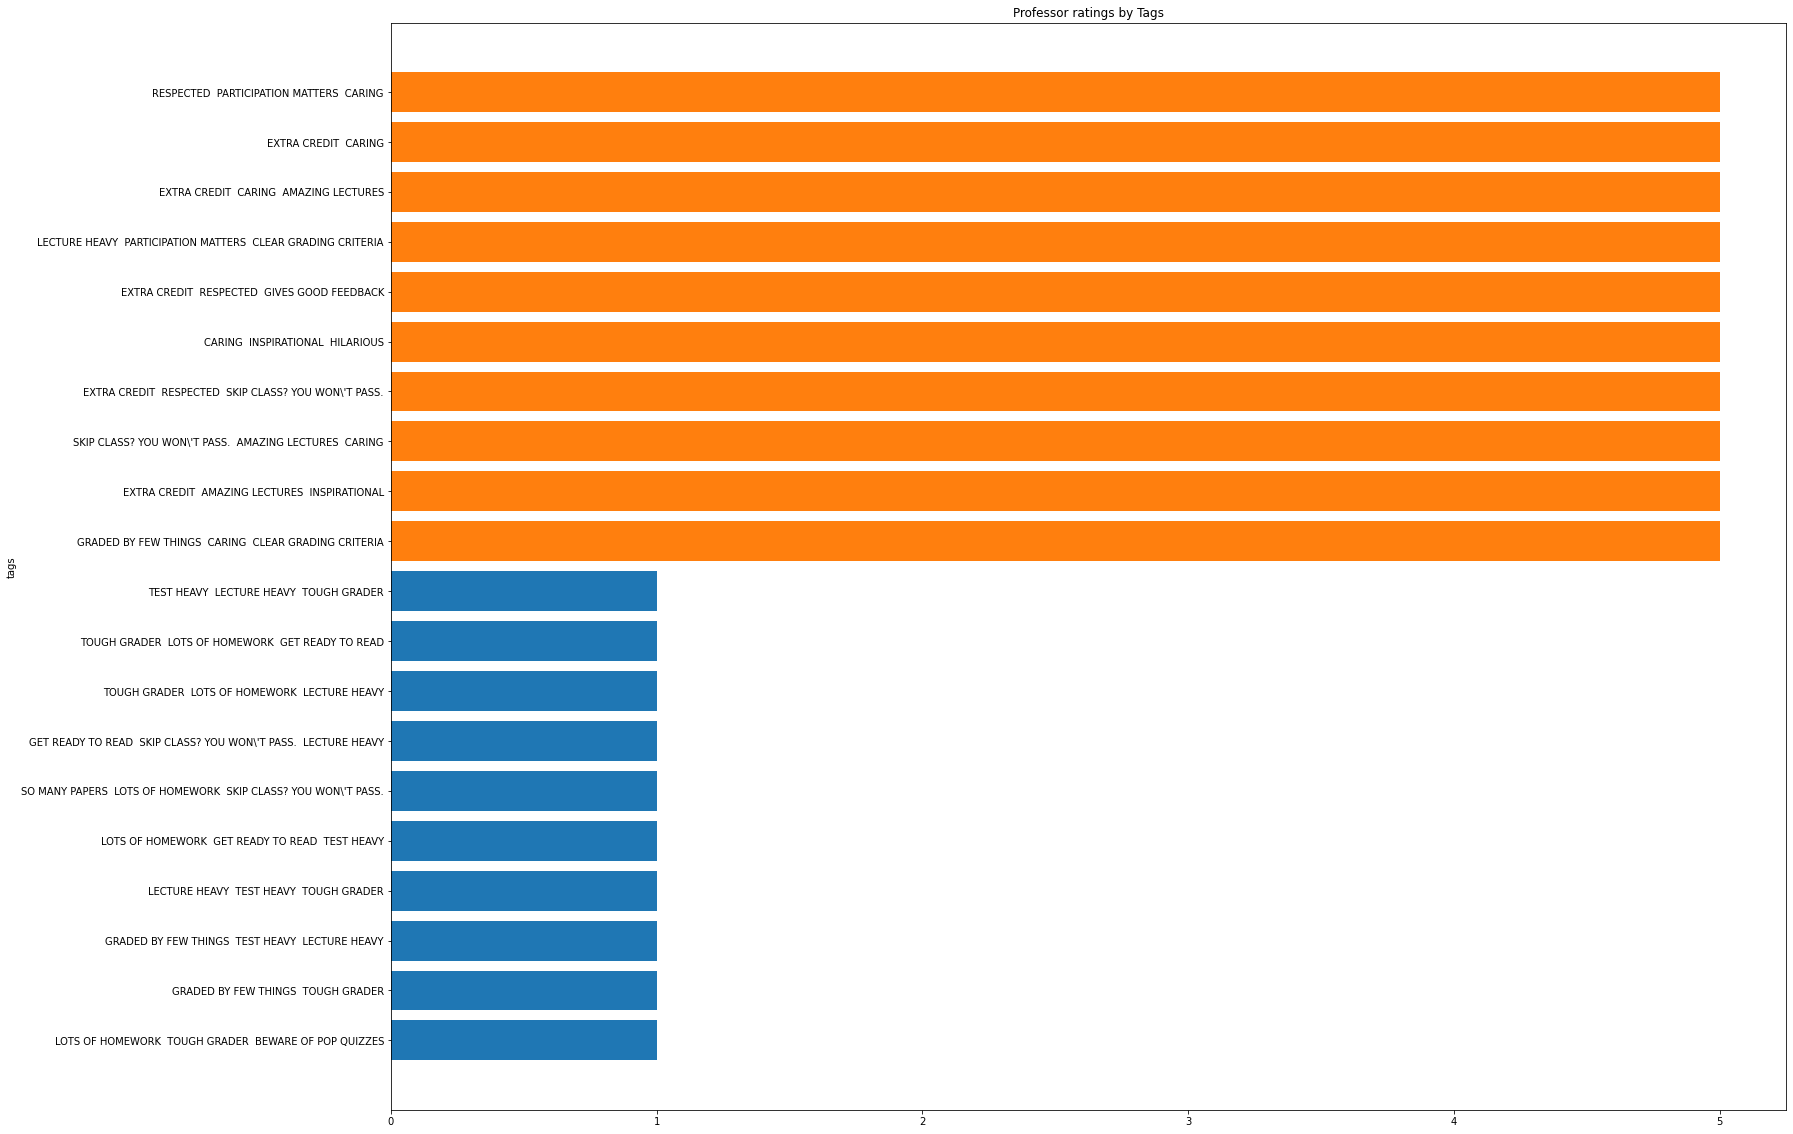

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25,20))
plt.barh(tag_new.tail(10).index,tag_new.tail(10))
plt.barh(tag_new.head(10).index,tag_new.head(10))

plt.ylabel("tags")
plt.title("Professor ratings by Tags")
plt.show()

In [141]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer 


def clean_text(text):
    token_words=word_tokenize(text)
    stemmer = SnowballStemmer('english')
    text_clean = ""
    punctuation = list(string.punctuation)

    for word in token_words:
        condition1= word not in punctuation
        condition2= word not in stopwords.words('english')
        if condition1 and condition2:
            stem = stemmer.stem
            text_clean = text_clean + ''+ stem
    return text_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = clean["stu_tags"].astype("str")

tfidf_vectorizer = TfidfVectorizer( max_features = 300, stop_words = 'english', ngram_range = (2,2))
tfidf = tfidf_vectorizer.fit_transform(corpus)

feature = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names())

feature

,accessible outside,amazing lectures,beware pop,caring accessible,caring amazing,caring beware,caring clear,caring extra,caring gives,caring group,...,things hilarious,things lecture,things lots,things ready,things respected,things skip,things test,things tough,tough grader,won pass
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.430169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279163
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14516,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14517,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14518,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294930
14519,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [143]:
stu_tags = np.hstack((feature.values, clean["student_star"].values.reshape(-1,1)))
nc_df1 = pd.DataFrame(stu_tags, columns = tfidf_vectorizer.get_feature_names()+["student_star"])
print(nc_df1)

       accessible outside  amazing lectures  beware pop  caring accessible  \
0                     0.0               0.0    0.000000                0.0   
1                     0.0               0.0    0.000000                0.0   
2                     0.0               0.0    0.000000                0.0   
3                     0.0               0.0    0.430169                0.0   
4                     0.0               0.0    0.000000                0.0   
...                   ...               ...         ...                ...   
14516                 0.0               0.0    0.000000                0.0   
14517                 0.0               0.0    0.000000                0.0   
14518                 0.0               0.0    0.000000                0.0   
14519                 0.0               0.0    0.000000                0.0   
14520                 0.0               0.0    0.000000                0.0   

       caring amazing  caring beware  caring clear  caring extr

In [144]:
 nc_df1.corr().abs()["student_star"].sort_values(ascending = False).head(10)

student_star        1.000000
tough grader        0.212691
gives good          0.156837
good feedback       0.156837
amazing lectures    0.129466
lecture heavy       0.114811
test heavy          0.111044
heavy tough         0.097293
clear grading       0.096535
grading criteria    0.096535
Name: student_star, dtype: float64

In [145]:
stu_linear = feature[[ "tough grader", "gives good","good feedback","amazing lectures","lecture heavy","test heavy","heavy tough","clear grading","grading criteria"]]
stu_linear

,tough grader,gives good,good feedback,amazing lectures,lecture heavy,test heavy,heavy tough,clear grading,grading criteria
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14516,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
14517,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
14518,0.0,0.0,0.0,0.0,0.33338,0.0,0.0,0.0,0.0
14519,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


## Analysis:Comments

In [146]:
clean["comments"].isnull().sum()

58

In [147]:
clean["comments"] = clean["comments"].fillna("Unknown")

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = clean["comments"].astype("str")

tfidf_vectorizer = TfidfVectorizer(max_features = 100, stop_words = 'english', ngram_range = (2,2))
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

features = pd.DataFrame(tfidf, columns = tfidf_vectorizer.get_feature_names())
features

,amazing professor,amazing teacher,answer questions,ask questions,attend class,attendance mandatory,awesome professor,awesome teacher,best professor,best professors,...,took class,tough grader,understand material,ve taken,want learn,wants students,waste time,willing help,work hard,worst teacher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
comment = np.hstack((features.values, clean["student_star"].values.reshape(-1,1)))
nc_df = pd.DataFrame(comment, columns = tfidf_vectorizer.get_feature_names()+["student_star"])
nc_df

,amazing professor,amazing teacher,answer questions,ask questions,attend class,attendance mandatory,awesome professor,awesome teacher,best professor,best professors,...,tough grader,understand material,ve taken,want learn,wants students,waste time,willing help,work hard,worst teacher,student_star
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
14518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
14519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [150]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression


student_star = clean['student_star']
corpus = clean["comments"].astype("str")

tfidf_vectorizer = TfidfVectorizer( max_features = 100, stop_words = 'english', ngram_range = (2,2))
tfidf = tfidf_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names())

# Build your linear regression model
X = tfidf_df.to_numpy()
y = clean['student_star'].to_numpy()

# Build model
linear_reg=LinearRegression()
linear_reg.fit(X,y)

count_lint = linear_reg.coef_
# Just need to add in these print statements! - Ali :)
print(linear_reg.intercept_)
print(linear_reg.coef_)

3.3961389748843187
[ 1.44508684  1.37746879 -0.00971263 -0.20169438  0.33323949  0.3459526
  1.39583948  1.38835346  1.49951557  1.40422077  1.48423083  1.01123006
 -0.57171591 -0.01002814  0.33909882  0.99409667  0.17769945  0.77946503
 -0.13039759  0.72676342 -0.0728341  -0.02912021  0.26785296 -0.34741208
  0.53648087  1.01030817  0.12452993  0.42575829  0.83401507  1.09634889
  0.90554289  0.54337324  1.26844632  0.96524514 -0.16925183  0.02285317
  0.56667278  0.50320522  0.7095446   0.64850879  1.26741224  1.25651859
 -0.08953577  0.5516521  -0.34715813  1.32931301  1.0730287   0.61515633
  0.73403734  0.98065515  0.90298643  0.39214072  0.32317875  0.52788043
  1.19579975  0.58606455  0.50198832  0.12093709  0.45331934  0.15893844
 -0.17857869 -0.38466595  0.21714011 -0.45883894  0.22317418  0.04729353
  0.6194348  -0.170239    0.32606083 -0.08389638 -0.32103861 -0.309126
  0.90238786  0.84231164  0.94626519  0.90199096 -0.52912991  0.56515933
 -0.04185752 -0.12643297  0.6028250

In [151]:
nc_df.corr().abs()["student_star"].sort_values(ascending = False).head(10)

student_star         1.000000
worst teacher        0.138103
great teacher        0.126169
great professor      0.109119
highly recommend     0.100709
waste time           0.100630
best teacher         0.089385
best professor       0.083403
cares students       0.079513
amazing professor    0.067422
Name: student_star, dtype: float64

In [152]:
comments_linear = nc_df[["worst teacher","great teacher","great professor","highly recommend","waste time", "best teacher",
       "best professor","cares students","amazing professor"]]

comments_linear

,worst teacher,great teacher,great professor,highly recommend,waste time,best teacher,best professor,cares students,amazing professor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
s = pd.concat((stu_linear,comments_linear),axis=1)


In [154]:
s

,tough grader,gives good,good feedback,amazing lectures,lecture heavy,test heavy,heavy tough,clear grading,grading criteria,worst teacher,great teacher,great professor,highly recommend,waste time,best teacher,best professor,cares students,amazing professor
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14516,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14517,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14518,0.0,0.0,0.0,0.0,0.33338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14519,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
high_rating = clean.query("student_star >= 4")
low_rating = clean.query("student_star <= 3")

In [156]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


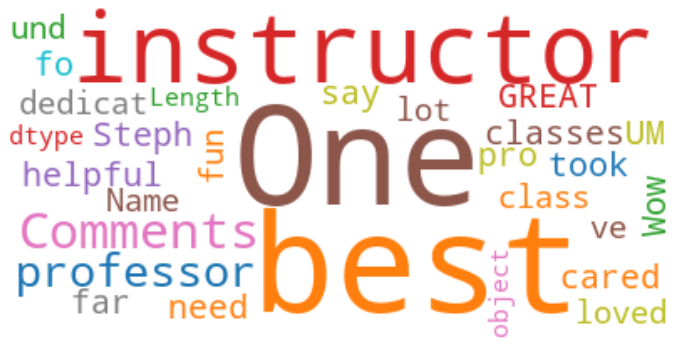

In [157]:
from wordcloud import WordCloud
high_tokens = high_rating["comments"].astype("str").apply(word_tokenize)
plt.figure(figsize=[12, 10])
wordcloud = WordCloud(background_color = "white", colormap = 'tab10', max_words = 300).generate(str(high_tokens))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

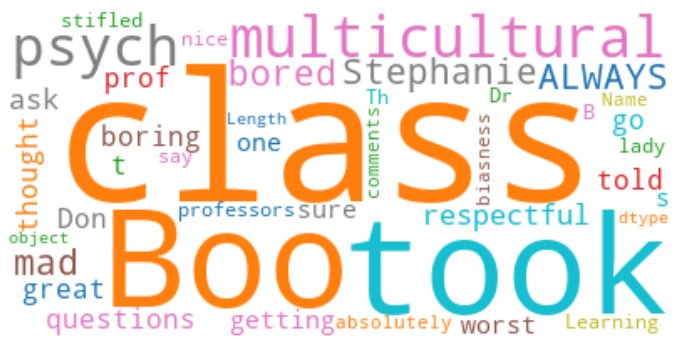

In [158]:
from wordcloud import WordCloud
low_tokens = low_rating["comments"].astype("str").apply(word_tokenize)
plt.figure(figsize=[12, 10])
wordcloud = WordCloud(background_color = "white", colormap = 'tab10', max_words = 300).generate(str(low_tokens))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = high_rating['comments'].astype("str")

high_bow = CountVectorizer(max_features = 30, ngram_range = (2,2), stop_words = 'english')

bow = high_bow.fit_transform(corpus)
bow_df = pd.DataFrame(bow.todense(),columns = high_bow.get_feature_names())

bow_df.sum().sort_values(ascending = False)


great teacher           654
great professor         487
highly recommend        325
extra credit            323
good teacher            289
make sure               276
easy class              271
willing help            265
cares students          258
pay attention           241
best teacher            214
best professor          211
class easy              183
makes class             173
class interesting       173
class fun               164
learned lot             157
good professor          156
office hours            154
easy understand         148
extremely helpful       144
knows stuff             143
definitely recommend    142
great class             138
really nice             136
nice guy                133
taking class            131
took class              128
awesome teacher         127
amazing professor       126
dtype: int64

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = low_rating['comments'].astype("str")

low_bow = CountVectorizer(max_features = 30, ngram_range = (2,2), stop_words = 'english')

bow = low_bow.fit_transform(corpus)
low_df = pd.DataFrame(bow.todense(),columns = low_bow.get_feature_names())

low_df.sum().sort_values(ascending = False)

nice guy            102
worst teacher        97
worst professor      90
waste time           83
good teacher         83
easy class           74
extra credit         72
online class         67
class easy           65
doesn know           64
horrible teacher     63
make sure            62
good grade           60
ask questions        57
read book            56
tough grader         55
hard understand      54
office hours         53
want learn           50
answer questions     49
class boring         49
teaching style       47
class just           47
stay away            46
nice lady            46
class time           46
nice person          44
good luck            44
taking class         44
pay attention        43
dtype: int64

sentiment 

In [161]:
clean['sentiment'] = clean['student_star'].apply(lambda x: +1 if x> 3 else -1)
clean['sentiment']

0        1
7       -1
8       -1
11       1
12       1
        ..
19680   -1
19681    1
19682   -1
19683   -1
19684   -1
Name: sentiment, Length: 14521, dtype: int64

# # COEF_

In [162]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=14521, n_features=20, n_informative=20, n_redundant=0, random_state=1)
# summarize the dataset
print(x.shape, y.shape)

(14521, 20) (14521,)


In [163]:
from sklearn.datasets import make_regression
# define dataset
x, y = make_regression(n_samples=14521, n_features=20, n_informative=20, random_state=1)
# summarize the dataset
print(x.shape, y.shape)

(14521, 20) (14521,)


Feature: 0, Score: 0.00750
Feature: 1, Score: 0.00020
Feature: 2, Score: -0.00161
Feature: 3, Score: 0.02931
Feature: 4, Score: -0.00561
Feature: 5, Score: 0.00628
Feature: 6, Score: -0.00430
Feature: 7, Score: 0.00267
Feature: 8, Score: -0.03125
Feature: 9, Score: -0.00947
Feature: 10, Score: -0.00225
Feature: 11, Score: 0.02149
Feature: 12, Score: -0.01844
Feature: 13, Score: -0.00506
Feature: 14, Score: 0.01704
Feature: 15, Score: -0.01720
Feature: 16, Score: 0.02440
Feature: 17, Score: 0.00367
Feature: 18, Score: -0.03628
Feature: 19, Score: 0.03477


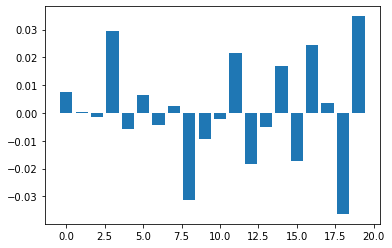

In [164]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=14521, n_features=20, n_informative=20, n_redundant=0, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [165]:
nlinear = clean[["age", "gender","grades","would_take_agains","help_useful","student_difficult","attence", "student_star"]]
nlinear

,age,gender,grades,would_take_agains,help_useful,student_difficult,attence,student_star
0,Middle,1,0,0,0,2.0,unknown,3.5
7,Middle,0,0,0,0,2.0,unknown,3.0
8,Young,0,0,0,2,4.0,unknown,1.0
11,Young,0,0,0,0,2.0,Mandatory,5.0
12,Young,0,0,0,0,3.0,Mandatory,5.0
...,...,...,...,...,...,...,...,...
19680,Old,0,0,0,1,4.0,unknown,1.0
19681,Old,0,0,0,0,1.0,unknown,5.0
19682,Old,0,6,1,0,2.0,Mandatory,3.0
19683,Old,0,0,0,0,4.0,unknown,1.5


In [166]:
dummies = pd.get_dummies(nlinear[["age","attence"]], drop_first = True)

In [167]:
nlinear = nlinear.drop(["age", "attence"], axis = 1)
nlinear.index=range(len(nlinear))
nlinear

,gender,grades,would_take_agains,help_useful,student_difficult,student_star
0,1,0,0,0,2.0,3.5
1,0,0,0,0,2.0,3.0
2,0,0,0,2,4.0,1.0
3,0,0,0,0,2.0,5.0
4,0,0,0,0,3.0,5.0
...,...,...,...,...,...,...
14516,0,0,0,1,4.0,1.0
14517,0,0,0,0,1.0,5.0
14518,0,6,1,0,2.0,3.0
14519,0,0,0,0,4.0,1.5


# Part 3: Model building

In [168]:
newdata = pd.concat((nlinear,s),axis=1)
newdata

,gender,grades,would_take_agains,help_useful,student_difficult,student_star,tough grader,gives good,good feedback,amazing lectures,...,grading criteria,worst teacher,great teacher,great professor,highly recommend,waste time,best teacher,best professor,cares students,amazing professor
0,1,0,0,0,2.0,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,2,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,2.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14516,0,0,0,1,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14517,0,0,0,0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14518,0,6,1,0,2.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14519,0,0,0,0,4.0,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
target_col = 'student_star'

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 
import pandas as pd
import statsmodels.api as sm

X = newdata.loc[:, newdata.columns != target_col]
y =  newdata.loc[:, target_col]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.params
predictions = model.predict(X) 
 
print_model = model.summary()
print_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           student_star   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     349.1
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:11:46   Log-Likelihood:                -22558.
No. Observations:               14521   AIC:                         4.516e+04
Df Residuals:                   14499   BIC:                         4.533e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7794      0.026    182.422      0.000       4.728       4.831
gender                0.0417      0.019      2.192      0.028       0.004       0.079
grades               -0.0029      0.005     -0.573      0.567      -0.013       0.007
would_take_agains     0.7404      0.035     20.996      0.000       0.671       0.810
help_useful          -0.1423      0.010    -14.606      0.000      -0.161      -0.123
student_difficult    -0.3918      0.008    -51.437      0.000      -0.407      -0.377
tough grader         -1.2214      0.099    -12.327      0.000      -1.416      -1.027
gives good            0.4479      0.060      7.502      0.000       0.331       0.565
good feedback         0.4479      0.060      7.502      0.000       0.331       0.565
amazing lectures      0.7274      0.138      5.286      0.000       0.458       0.997
lecture heavy        -1.3144      0.127    -10.309      0.000      -1.564      -1.064
test heavy           -1.4351      0.212     -6.770      0.000      -1.851      -1.020
heavy tough           0.0906      0.257      0.353      0.724      -0.412       0.594
clear grading         0.1143      0.071      1.620      0.105      -0.024       0.253
grading criteria      0.1143      0.071      1.620      0.105      -0.024       0.253
worst teacher        -1.7313      0.136    -12.760      0.000      -1.997      -1.465
great teacher         0.8817      0.059     15.034      0.000       0.767       0.997
great professor       0.7709      0.070     10.976      0.000       0.633       0.909
highly recommend      0.8562      0.095      9.047      0.000       0.671       1.042
waste time           -1.5334      0.136    -11.306      0.000      -1.799      -1.268
best teacher          0.9669      0.101      9.594      0.000       0.769       1.164
best professor        0.8154      0.101      8.084      0.000       0.618       1.013
cares students        0.6558      0.100      6.537      0.000       0.459       0.852
amazing professor     0.7980      0.128      6.212      0.000       0.546       1.050
==============================================================================
Omnibus:                      722.410   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.505
Skew:                          -0.577   Prob(JB):                    9.14e-180
Kurtosis:                       2.821   Cond. No.                     1.04e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
X = newdata.loc[:, newdata.columns != target_col].to_numpy()
y =  newdata.loc[:, target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


print("beta 0: {:.4f}".format(linear_reg.intercept_))
for i in range(23):
    print("beta {}: {:.4f}".format(i+1, linear_reg.coef_[i]))

beta 0: 4.7853
beta 1: 0.0459
beta 2: -0.0006
beta 3: 0.7430
beta 4: -0.1515
beta 5: -0.3997
beta 6: -1.1336
beta 7: 0.4560
beta 8: 0.4560
beta 9: 0.7244
beta 10: -1.3209
beta 11: -1.6380
beta 12: 0.2030
beta 13: 0.0703
beta 14: 0.0703
beta 15: -1.6521
beta 16: 0.8766
beta 17: 0.7214
beta 18: 0.8138
beta 19: -1.4869
beta 20: 0.9326
beta 21: 0.8808
beta 22: 0.6270
beta 23: 0.7723


In [173]:
y_pred = linear_reg.predict(X_test)
test_mse = mse(y_pred, y_test) 
print('MSE: {:.4f}'.format(test_mse))
test_mse2 = test_mse**2
print('RMSE: {:.4f}'.format(test_mse2))

MSE: 1.3066
RMSE: 1.7072


In [174]:
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_pred)
print("R-Square Error: {}".format(r_square))

R-Square Error: 0.3276364859049651
